# –ü—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏–µ –æ—Ç—Ç–æ–∫–∞ –∫–ª–∏–µ–Ω—Ç–æ–≤ –≤ —Å–µ—Ç–∏ –æ—Ç–µ–ª–µ–π ¬´–ö–∞–∫ –≤ –≥–æ—Å—Ç—è—Ö¬ª

### –®–∞–≥ 1. –û—Ç–∫—Ä–æ–π—Ç–µ —Ñ–∞–π–ª—ã —Å –¥–∞–Ω–Ω—ã–º–∏

In [1]:
%pip install optuna
%pip install category_encoders

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 404 kB 1.1 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 81 kB 1.1 MB/s eta 0:00:011
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import random

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import category_encoders as ce
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import optuna
import joblib

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
hotel_train = pd.read_csv('/datasets/hotel_train.csv')
hotel_test = pd.read_csv('/datasets/hotel_test.csv')

In [6]:
#–§—É–Ω–∫—Ü–∏—è –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ –¥–∞—Ç–∞—Å–µ—Ç–æ–≤
def information(data):
    display(data.head())
    print(data.info())
    print('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥—É–±–ª–∏–∫–∞—Ç–æ–≤:', data['id'].duplicated().sum())
    print(f'''–ü—Ä–æ–ø—É—Å–∫–æ–≤:
{data.isna().sum()}''')
    display(data.describe())
    print(data.shape)

In [7]:
information(hotel_train)

id  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0   0            0        7.0               2015               July   
1   1            0       14.0               2015               July   
2   2            0        0.0               2015               July   
3   3            0        9.0               2015               July   
4   4            1       85.0               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     1     1.0       0.0     0.0   
1                        0                     2     2.0       0.0     0.0   
2                        0                     2     2.0       0.0     0.0   
3                        0                     2     2.0       0.0     0.0   
4                        0                     3     2.0       0.0     0.0   

        meal country distribution_channel  is_repeated_guest  \
0  BB            GBR               Direct                  0   
1  BB            GBR                TA/TO                  0   
2  BB            PRT               Direct                  0   
3  FB            PRT               Direct                  0   
4  BB            PRT                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0   A                  
1                       0                               0   A                  
2                       0                               0   C                  
3                       0                               0   C                  
4                       0                               0   A                  

   booking_changes  days_in_waiting_list customer_type  \
0                0                     0     Transient   
1                0                     0     Transient   
2                0                     0     Transient   
3                0                     0     Transient   
4                0                     0     Transient   

   required_car_parking_spaces  total_of_special_requests  total_nights  
0                            0                          0             1  
1                            0                          1             2  
2                            0                          0             2  
3                            0                          1             2  
4                            0                          1             3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65229 entries, 0 to 65228
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              65229 non-null  int64  
 1   is_canceled                     65229 non-null  int64  
 2   lead_time                       65229 non-null  float64
 3   arrival_date_year               65229 non-null  int64  
 4   arrival_date_month              65229 non-null  object 
 5   arrival_date_week_number        65229 non-null  int64  
 6   arrival_date_day_of_month       65229 non-null  int64  
 7   stays_in_weekend_nights         65229 non-null  int64  
 8   stays_in_week_nights            65229 non-null  int64  
 9   adults                          65229 non-null  float64
 10  children                        65229 non-null  float64
 11  babies                          65229 non-null  float64
 12  meal                            

id   is_canceled     lead_time  arrival_date_year  \
count  65229.000000  65229.000000  65229.000000       65229.000000   
mean   43544.069172      0.368609     96.337917        2015.719021   
std    25614.858971      0.482431     96.127545           0.449481   
min        0.000000      0.000000      0.000000        2015.000000   
25%    19108.000000      0.000000     17.000000        2015.000000   
50%    40554.000000      0.000000     64.000000        2016.000000   
75%    67414.000000      1.000000    151.000000        2016.000000   
max    84121.000000      1.000000    374.000000        2016.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count              65229.000000               65229.000000   
mean                  31.339772                  15.847813   
std                   13.464024                   8.748182   
min                    1.000000                   1.000000   
25%                   21.000000                   8.000000   
50%                   34.000000                  16.000000   
75%                   42.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights        adults  \
count             65229.000000          65229.000000  65229.000000   
mean                  0.825185              2.224793      1.836576   
std                   0.853477              1.354992      0.480245   
min                   0.000000              0.000000      0.000000   
25%                   0.000000              1.000000      2.000000   
50%                   1.000000              2.000000      2.000000   
75%                   2.000000              3.000000      2.000000   
max                   4.000000              6.000000      4.000000   

           children        babies  is_repeated_guest  previous_cancellations  \
count  65229.000000  65229.000000       65229.000000            65229.000000   
mean       0.074890      0.007236           0.027151                0.128915   
std        0.334243      0.098790           0.162523                0.965326   
min        0.000000      0.000000           0.000000                0.000000   
25%        0.000000      0.000000           0.000000                0.000000   
50%        0.000000      0.000000           0.000000                0.000000   
75%        0.000000      0.000000           0.000000                0.000000   
max        3.000000     10.000000           1.000000               26.000000   

       previous_bookings_not_canceled  booking_changes  days_in_waiting_list  \
count                    65229.000000     65229.000000          65229.000000   
mean                         0.107713         0.194269              3.334422   
std                          1.326638         0.593838             18.239606   
min                          0.000000         0.000000              0.000000   
25%                          0.000000         0.000000              0.000000   
50%                          0.000000         0.000000              0.000000   
75%                          0.000000         0.000000              0.000000   
max                         58.000000        17.000000            259.000000   

       required_car_parking_spaces  total_of_special_requests  total_nights  
count                 65229.000000               65229.000000  65229.000000  
mean                      0.056647                   0.512763      3.049978  
std                       0.232094                   0.752590      1.738108  
min                       0.000000                   0.000000      1.000000  
25%                       0.000000                   0.000000      2.000000  
50%                       0.000000                   0.000000      3.000000  
75%                       0.000000                   1.000000      4.000000  
max                       3.000000                   5.000000     10.000000

(65229, 25)


In [8]:
information(hotel_test)

id  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  6086            1       74.0               2017            January   
1  6087            1       62.0               2017            January   
2  6088            1       62.0               2017            January   
3  6089            1       71.0               2017            January   
4  6090            1      172.0               2017            January   

   arrival_date_week_number  arrival_date_day_of_month  \
0                         1                          1   
1                         1                          1   
2                         1                          1   
3                         1                          1   
4                         1                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        1                     0     2.0       0.0     0.0   
1                        2                     2     2.0       0.0     0.0   
2                        2                     2     2.0       0.0     0.0   
3                        2                     2     1.0       0.0     0.0   
4                        2                     5     2.0       0.0     0.0   

        meal country distribution_channel  is_repeated_guest  \
0  BB            PRT                TA/TO                  0   
1  BB            AUT                TA/TO                  0   
2  BB            AUT                TA/TO                  0   
3  BB            PRT                TA/TO                  0   
4  BB            BEL                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0   A                  
1                       0                               0   A                  
2                       0                               0   A                  
3                       0                               0   A                  
4                       0                               0   A                  

   booking_changes  days_in_waiting_list customer_type  \
0                0                     0     Transient   
1                0                     0     Transient   
2                0                     0     Transient   
3                0                     0     Transient   
4                0                     0     Transient   

   required_car_parking_spaces  total_of_special_requests  total_nights  
0                            0                          0             1  
1                            0                          1             4  
2                            0                          1             4  
3                            0                          1             4  
4                            0                          0             7

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32412 entries, 0 to 32411
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              32412 non-null  int64  
 1   is_canceled                     32412 non-null  int64  
 2   lead_time                       32412 non-null  float64
 3   arrival_date_year               32412 non-null  int64  
 4   arrival_date_month              32412 non-null  object 
 5   arrival_date_week_number        32412 non-null  int64  
 6   arrival_date_day_of_month       32412 non-null  int64  
 7   stays_in_weekend_nights         32412 non-null  int64  
 8   stays_in_week_nights            32412 non-null  int64  
 9   adults                          32412 non-null  float64
 10  children                        32412 non-null  float64
 11  babies                          32412 non-null  float64
 12  meal                            

id   is_canceled     lead_time  arrival_date_year  \
count  32412.000000  32412.000000  32412.000000            32412.0   
mean   60131.505183      0.388467     97.587869             2017.0   
std    29953.586177      0.487409     86.507146                0.0   
min     6086.000000      0.000000      0.000000             2017.0   
25%    45291.750000      0.000000     23.000000             2017.0   
50%    53394.500000      0.000000     76.000000             2017.0   
75%    89800.250000      1.000000    155.000000             2017.0   
max    97903.000000      1.000000    373.000000             2017.0   

       arrival_date_week_number  arrival_date_day_of_month  \
count              32412.000000               32412.000000   
mean                  17.804054                  15.656948   
std                    9.177384                   8.766429   
min                    1.000000                   1.000000   
25%                   10.000000                   8.000000   
50%                   18.000000                  15.500000   
75%                   25.000000                  23.000000   
max                   35.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights        adults  \
count             32412.000000           32412.00000  32412.000000   
mean                  0.867888               2.34009      1.858602   
std                   0.853394               1.37517      0.489341   
min                   0.000000               0.00000      0.000000   
25%                   0.000000               1.00000      2.000000   
50%                   1.000000               2.00000      2.000000   
75%                   2.000000               3.00000      2.000000   
max                   4.000000               6.00000      4.000000   

           children        babies  is_repeated_guest  previous_cancellations  \
count  32412.000000  32412.000000       32412.000000            32412.000000   
mean       0.083765      0.005523           0.031377                0.011601   
std        0.343470      0.075757           0.174338                0.180473   
min        0.000000      0.000000           0.000000                0.000000   
25%        0.000000      0.000000           0.000000                0.000000   
50%        0.000000      0.000000           0.000000                0.000000   
75%        0.000000      0.000000           0.000000                0.000000   
max        3.000000      2.000000           1.000000                6.000000   

       previous_bookings_not_canceled  booking_changes  days_in_waiting_list  \
count                    32412.000000     32412.000000          32412.000000   
mean                         0.171418         0.216741              0.262341   
std                          1.875170         0.640551              4.733027   
min                          0.000000         0.000000              0.000000   
25%                          0.000000         0.000000              0.000000   
50%                          0.000000         0.000000              0.000000   
75%                          0.000000         0.000000              0.000000   
max                         72.000000        18.000000            223.000000   

       required_car_parking_spaces  total_of_special_requests  total_nights  
count                 32412.000000               32412.000000  32412.000000  
mean                      0.046248                   0.657781      3.207979  
std                       0.219367                   0.834341      1.738683  
min                       0.000000                   0.000000      1.000000  
25%                       0.000000                   0.000000      2.000000  
50%                       0.000000                   0.000000      3.000000  
75%                       0.000000                   1.000000      4.000000  
max                       8.000000                   5.000000     10.000000

(32412, 25)


In [9]:
hotel_train.dtypes == hotel_test.dtypes #–°–º–æ—Ç—Ä–∏–º, –æ–¥–∏–Ω–∞–∫–æ–≤—ã –ª–∏ —Ç–∏–ø—ã –¥–∞–Ω–Ω—ã—Ö –≤ –¥–∞—Ç–∞—Å–µ—Ç–∞—Ö

id                                True
is_canceled                       True
lead_time                         True
arrival_date_year                 True
arrival_date_month                True
arrival_date_week_number          True
arrival_date_day_of_month         True
stays_in_weekend_nights           True
stays_in_week_nights              True
adults                            True
children                          True
babies                            True
meal                              True
country                           True
distribution_channel              True
is_repeated_guest                 True
previous_cancellations            True
previous_bookings_not_canceled    True
reserved_room_type                True
booking_changes                   True
days_in_waiting_list              True
customer_type                     True
required_car_parking_spaces       True
total_of_special_requests         True
total_nights                      True
dtype: bool

In [10]:
#–ü—Ä–æ–≤–µ—Ä–∏–º —Å—Ç–æ–ª–±–µ—Ü —Å–æ –≤–∑—Ä–æ—Å–ª—ã–º–∏ –ø–æ—Å—Ç–æ—è–ª—å—Ü–∞–º–∏, –≥–¥–µ –∏—Ö –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–∞–≤–Ω–æ –Ω—É–ª—é
zero_train = hotel_train.loc[(hotel_train['adults'] == 0) & (hotel_train['children'] == 0), 'adults']
print('–ù–æ–ª—å –ø–æ—Å—Ç–æ—è–ª—å—Ü–µ–≤ –≤ hotel_train:', zero_train.count())

–ù–æ–ª—å –ø–æ—Å—Ç–æ—è–ª—å—Ü–µ–≤ –≤ hotel_train: 15


In [11]:
zero_test = hotel_test.loc[(hotel_test['adults'] == 0) & (hotel_test['children'] == 0), 'adults']
print('–ù–æ–ª—å –ø–æ—Å—Ç–æ—è–ª—å—Ü–µ–≤ –≤ hotel_test:', zero_test.count())

–ù–æ–ª—å –ø–æ—Å—Ç–æ—è–ª—å—Ü–µ–≤ –≤ hotel_test: 7


In [12]:
categorical_columns = hotel_train.loc[:,  (hotel_train.dtypes == 'object')].columns #–°–ø–∏—Å–æ–∫ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö —Å—Ç–æ–ª–±—Ü–æ–≤ object

In [13]:
datas = [hotel_train, hotel_test] #–ü—Ä–æ–≤–µ—Ä–∏–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ —Å—Ç–æ–ª–±—Ü—ã –Ω–∞ —Å–∫—Ä—ã—Ç—ã–µ –¥—É–±–ª–∏–∫–∞—Ç—ã
for data in datas:
    for column in categorical_columns:
        print(sorted(data[column].unique()))
        print(f'–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π {column}:', data[column].nunique())

['April', 'August', 'December', 'February', 'January', 'July', 'June', 'March', 'May', 'November', 'October', 'September']
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π arrival_date_month: 12
['BB       ', 'FB       ', 'HB       ', 'SC', 'SC       ']
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π meal: 5
['ABW', 'AGO', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'ATA', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR', 'BHR', 'BIH', 'BLR', 'BOL', 'BRA', 'BRB', 'BWA', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'CN', 'COL', 'CPV', 'CRI', 'CUB', 'CYM', 'CYP', 'CZE', 'DEU', 'DMA', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ESP', 'EST', 'ETH', 'FIN', 'FRA', 'GAB', 'GBR', 'GEO', 'GGY', 'GIB', 'GLP', 'GNB', 'GRC', 'GUY', 'HKG', 'HND', 'HRV', 'HUN', 'IDN', 'IMN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JEY', 'JOR', 'JPN', 'KAZ', 'KEN', 'KHM', 'KNA', 'KOR', 'KWT', 'LBN', 'LBY', 'LCA', 'LIE', 'LKA', 'LTU', 'LUX', 'LVA', 'MAC', 'MAR', 'MCO', 'MDV', 'MEX', 'MKD', 'MLI

–ö–∞–∫ –≤–∏–¥–∏–º, —á–∏—Å–ª–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –≤ —Å—Ç–æ–ª–±—Ü–µ meal –¥–æ–ª–∂–Ω–æ –±—ã—Ç—å 4, –Ω–æ –∏—Ö 5, –æ–Ω–∏ –Ω–µ —Å–æ–≤–ø–∞–¥–∞—é—Ç, –≤ —Ç—á –∏–∑-–∑–∞ –ø—Ä–æ–±–µ–ª–æ–≤. –¢–∞–∫–∂–µ –µ—Å—Ç—å –ø—Ä–æ–±–µ–ª—ã –≤ —Å—Ç–æ–ª–±—Ü–µ distribution_channel. –ù—É–∂–Ω–æ –∏—Å–ø—Ä–∞–≤–∏—Ç—å. –ê –≤ —Ü–µ–ª–æ–º –º—ã –≤–∏–¥–∏–º, —á—Ç–æ –æ–±–∞ –¥–∞—Ç–∞—Å–µ—Ç–∞ –∞–±—Å–æ–ª—é—Ç–Ω–æ —Å–∏–º–º–µ—Ç—Ä–∏—á–Ω—ã–µ, —Ç–∏–ø—ã –¥–∞–Ω–Ω—ã—Ö –æ–¥–∏–Ω–∞–∫–æ–≤—ã, –¥—É–±–ª–∏–∫–∞—Ç—ã –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—Ç, –ø—Ä–æ–ø—É—Å–∫–æ–≤ –Ω–µ—Ç. –°—Ç–æ–ª–±–µ—Ü id –Ω–∞–º –Ω–µ –Ω—É–∂–µ–Ω. –£–¥–∞–ª–∏–º —Å—Ç—Ä–æ–∫–∏ —Å –Ω—É–ª–µ–≤—ã–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –ø–æ—Å—Ç–æ—è–ª—å—Ü–µ–≤.

### –®–∞–≥ 2. –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –∏ –∏—Å—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö

In [14]:
#–£–¥–∞–ª—è–µ–º —Å—Ç—Ä–æ–∫–∏ —Å –Ω—É–ª–µ–≤—ã–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –ø–æ—Å—Ç–æ—è–ª—å—Ü–µ–≤
hotel_train = hotel_train.drop(zero_train.index).reset_index(drop=True)
hotel_test = hotel_test.drop(zero_test.index).reset_index(drop=True)

In [15]:
hotel_train.shape

(65214, 25)

In [16]:
datas = [hotel_train, hotel_test]
for data in datas: #–ò—Å–ø—Ä–∞–≤–ª—è–µ–º
    for column in ['meal', 'reserved_room_type']:
        data[column] = data[column].str.strip()
        print(sorted(data[column].unique()))
        print(f'–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π {column}:', data[column].nunique())

['BB', 'FB', 'HB', 'SC']
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π meal: 4
['A', 'B', 'C', 'D', 'E', 'F', 'G']
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π reserved_room_type: 7
['BB', 'FB', 'HB', 'SC']
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π meal: 4
['A', 'B', 'C', 'D', 'E', 'F', 'G']
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π reserved_room_type: 7


In [17]:
#–£–¥–∞–ª—è–µ–º id
hotel_train.drop(columns='id', inplace=True)
hotel_test.drop(columns='id', inplace=True)

–ü—Ä–æ–≤–µ—Ä–∏–º –Ω–∞ –¥—É–±–ª–∏–∫–∞—Ç—ã –±–µ–∑ —Å—Ç–æ–ª–±—Ü–∞ id.

In [18]:
print(f'–î—É–±–ª–∏–∫–∞—Ç–æ–≤ –≤ hotel_train: {round(hotel_train.duplicated().mean() * 100, 2)}%')
print(f'–î—É–±–ª–∏–∫–∞—Ç–æ–≤ –≤ hotel_test: {round(hotel_test.duplicated().mean() * 100, 2)}%')

–î—É–±–ª–∏–∫–∞—Ç–æ–≤ –≤ hotel_train: 32.78%
–î—É–±–ª–∏–∫–∞—Ç–æ–≤ –≤ hotel_test: 23.81%


–û—à–µ–ª–æ–º–ª—è—é—â–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç, –ø—Ä–∏—á–µ–º, —Å—É–¥—è –ø–æ –ø—Ä–∏–∑–Ω–∞–∫–∞–º, —ç—Ç–æ –Ω–µ –º–æ–∂–µ—Ç –±—ã—Ç—å –ø—Ä–æ—Å—Ç–æ —Å–æ–≤–ø–∞–¥–µ–Ω–∏–µ–º. –ù–æ —ç—Ç–æ –≤–ø–æ–ª–Ω–µ –º–æ–≥–ª–∏ –±—ã—Ç—å –Ω–µ—Å–∫–æ–ª—å–∫–æ –±—Ä–æ–Ω–∏—Ä–æ–≤–∞–Ω–∏–π, —Å–¥–µ–ª–∞–Ω–Ω—ã—Ö –æ–¥–Ω–∏–º –∫–ª–∏–µ–Ω—Ç–æ–º –≤ –æ–¥–∏–Ω –¥–µ–Ω—å. –ü—Ä–æ–≤–µ—Ä–∏—Ç—å –Ω–∞–≤–µ—Ä–Ω—è–∫–∞ –º—ã —ç—Ç–æ –Ω–µ –º–æ–∂–µ–º. –ü–æ—ç—Ç–æ–º—É —É–¥–∞–ª—è—Ç—å –Ω–µ –±—É–¥–µ–º.

# –ò—Å—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑

–î–∞–ª–µ–µ –∏—Å—Å–ª–µ–¥—É–µ–º –Ω–∞—à —Ü–µ–ª–µ–≤–æ–π –ø—Ä–∏–∑–Ω–∞–∫ is_canceled, –ø—Ä–æ–≤–µ—Ä–∏–º –µ–≥–æ –Ω–∞ –≤—ã–±—Ä–æ—Å—ã, —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∏ –±–∞–ª–∞–Ω—Å.

In [19]:
colors = sns.color_palette('pastel')
sns.set(rc={'figure.figsize':(15, 5)}, palette=colors) #–ó–∞–¥–∞–º –Ω–∞—Å—Ç—Ä–æ–π–∫–∏ —Ç–∞–±–ª–∏—Ü

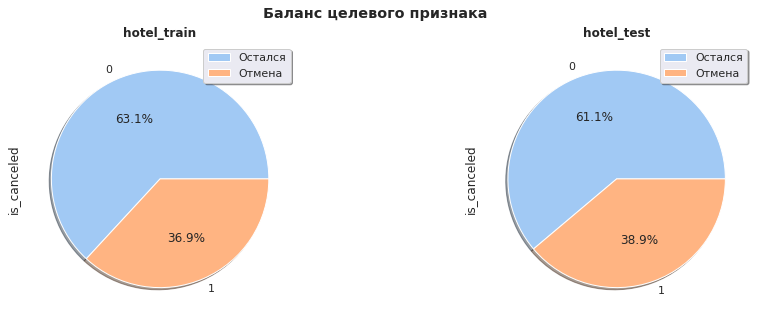

In [20]:
datas = [hotel_train, hotel_test]
titles = ['hotel_train', 'hotel_test']
fig, ax = plt.subplots(1, 2)
fig.suptitle('–ë–∞–ª–∞–Ω—Å —Ü–µ–ª–µ–≤–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞', fontweight="bold")
AX = 0
for data in datas:
    data.is_canceled.value_counts().plot(kind='pie', shadow=True, autopct='%1.1f%%', ax=ax[AX])
    ax[AX].legend(['–û—Å—Ç–∞–ª—Å—è', '–û—Ç–º–µ–Ω–∞'], shadow=True)
    ax[AX].set_title(titles[AX], fontweight="bold")
    AX += 1
plt.show()

–ú—ã –Ω–∞–±–ª—é–¥–∞–µ–º –Ω–µ–∫–∏–π –¥–∏—Å–±–∞–ª–∞–Ω—Å —Ü–µ–ª–µ–≤–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞, –∫–æ—Ç–æ—Ä—ã–π –Ω—É–∂–Ω–æ –≤ –¥–∞–ª—å–Ω–µ–π—à–µ–º —É—Ä–∞–≤–Ω—è—Ç—å, —Ö–æ—Ç—è –æ–Ω –Ω–µ —è–≤–ª—è–µ—Ç—Å—è –∫—Ä–∏—Ç–∏—á–Ω—ã–º.

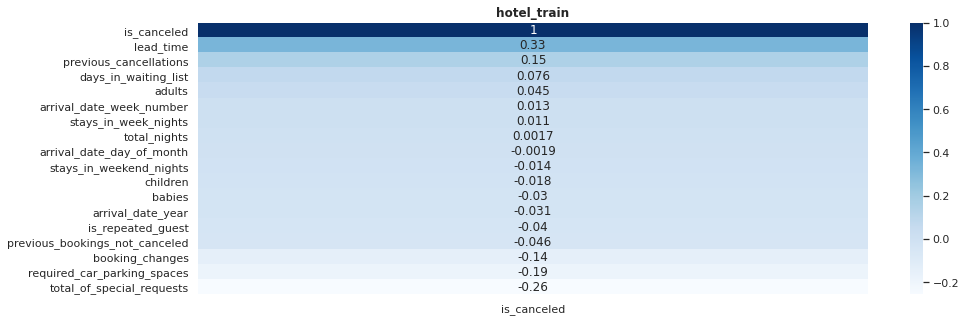

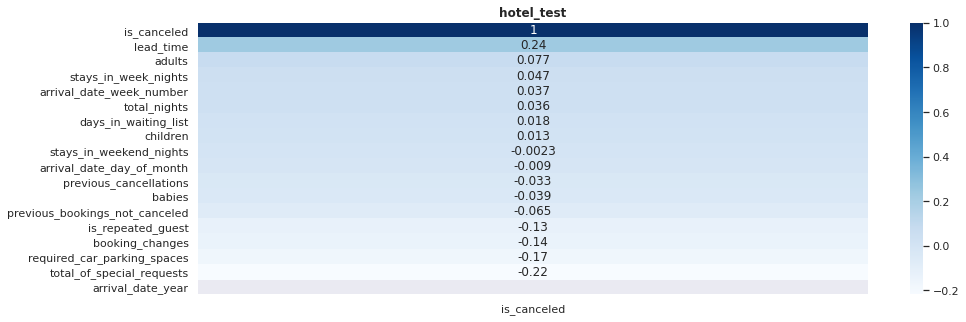

In [21]:
datas = [hotel_train, hotel_test]
AX = 0
for data in datas:
    sns.heatmap(data.corr()[['is_canceled']].sort_values('is_canceled', ascending=False),
                annot = True, annot_kws = {"size":12}, cmap='Blues')
    plt.title(titles[AX], fontweight="bold")
    AX += 1
    plt.show()

–í—ã–≤–æ–¥—ã –∏–∑ –∏–∑—É—á–µ–Ω–∏—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π:

- –û—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω–æ (–ø—Ä—è–º–∞—è –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å) –Ω–∞ —Å–∏—Ç—É–∞—Ü–∏—é –≤–ª–∏—è—é—Ç —Ç–∞–∫–∏–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏, –∫–∞–∫ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–Ω–µ–π –º–µ–∂–¥—É –¥–∞—Ç–æ–π –±—Ä–æ–Ω–∏—Ä–æ–≤–∞–Ω–∏—è –∏ –¥–∞—Ç–æ–π –ø—Ä–∏–±—ã—Ç–∏—è, –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤–∑—Ä–æ—Å–ª—ã—Ö –ø–æ—Å—Ç–æ—è–ª—å—Ü–µ–≤, –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–Ω–µ–π –æ–∂–∏–¥–∞–Ω–∏—è –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–µ–Ω–∏—è, –Ω–µ–¥–µ–ª—è –∑–∞–µ–∑–¥–∞. –ì—Ä–∞—Ñ–∞ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–º–µ–Ω–µ–Ω–Ω—ã—Ö –∑–∞–∫–∞–∑–æ–≤ —É –∫–ª–∏–µ–Ω—Ç–∞ –≤ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ –∏–º–µ–µ—Ç –ø—Ä—è–º—É—é –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Å –æ—Ç–º–µ–Ω–æ–π –±—Ä–æ–Ω–∏—Ä–æ–≤–∞–Ω–∏—è, –Ω–æ –≤–Ω–µ–∑–∞–ø–Ω–æ –≤ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ - –æ–±—Ä–∞—Ç–Ω—É—é –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å. –í–æ–∑–º–æ–∂–Ω–æ, –∑–∞ 2017 –≥–æ–¥ —É –Ω–∞—Å –∏–º–µ—é—Ç—Å—è –Ω–µ–ø–æ–ª–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –ø–æ —ç—Ç–æ–π –≥—Ä–∞—Ñ–µ.
- –ü–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ –Ω–∞ —Å–∏—Ç—É–∞—Ü–∏—é —Å –æ—Ç–º–µ–Ω–æ–π –±—Ä–æ–Ω–∏ –≤–ª–∏—è—é—Ç —Ç–∞–∫–∏–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –∫–∞–∫ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–ø–µ—Ü–∏–∞–ª—å–Ω—ã—Ö –æ—Ç–º–µ—Ç–æ–∫, –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç—å –º–µ—Å—Ç–∞ –¥–ª—è –∞–≤—Ç–æ–º–æ–±–∏–ª—è, –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–∑–º–µ–Ω–µ–Ω–∏–π –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –∑–∞–∫–∞–∑–∞, —Ä–µ–≥—É–ª—è—Ä–Ω–æ—Å—Ç—å –ø–æ—Å–µ—â–µ–Ω–∏—è –≥–æ—Å—Ç–µ–º –æ—Ç–µ–ª—è –∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥—ë–Ω–Ω—ã—Ö –∑–∞–∫–∞–∑–æ–≤ —É –∫–ª–∏–µ–Ω—Ç–∞.

–•–æ—Ç–µ–ª–æ—Å—å –±—ã –ø–æ–Ω—è—Ç—å, —Ä–∞–≤–Ω—ã –ª–∏ —Å–æ–≤–æ–∫—É–ø–Ω–æ—Å—Ç–∏ —Å—Ç–æ–ª–±—Ü–∞ previous_cancellations –≤ –¥–≤—É—Ö –¥–∞—Ç–∞—Å–µ—Ç–∞—Ö. –í—ã–¥–≤–∏–Ω–µ–º –≥–∏–ø–æ—Ç–µ–∑—ã:

- –ù0: –û–Ω–∏ —Ä–∞–≤–Ω—ã
- –ù1: –ù–µ —Ä–∞–≤–Ω—ã

In [22]:
def hypothesis(data1, data2): #–°–æ–∑–¥–∞–¥–∏–º —Ñ—É–Ω–∫—Ü–∏—é, –≤–¥—Ä—É–≥ –Ω–∞–º –ø—Ä–∏–¥–µ—Ç—Å—è —Å—Ä–∞–≤–Ω–∏–≤–∞—Ç—å —Å–æ–≤–æ–∫—É–ø–Ω–æ—Å—Ç–∏ –≤ –¥–∞–ª—å–Ω–µ–π—à–µ–º
    alpha = .05
    results = st.ttest_ind(data1, data2)
    print('p-–∑–Ω–∞—á–µ–Ω–∏–µ:', results.pvalue / 2) #–î–µ–ª—é –Ω–∞ –¥–≤–∞, —Ç–∫ –º–Ω–µ –ø–æ–Ω–∞–¥–æ–±–∏—Ç—Å—è –≤ –¥–∞–ª—å–Ω–µ–π—à–µ–º –æ–¥–Ω–æ—Å—Ç–æ—Ä–æ–Ω–Ω–∏–π —Ç–µ—Å—Ç
    if (results.pvalue / 2) < alpha:
        print('–û—Ç–≤–µ—Ä–≥–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É')
    else:
        print('–ü—Ä–∏–Ω–∏–º–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É')

In [23]:
hypothesis(hotel_train['previous_cancellations'], hotel_test['previous_cancellations'])

p-–∑–Ω–∞—á–µ–Ω–∏–µ: 1.9059247199034706e-104
–û—Ç–≤–µ—Ä–≥–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É


–ü–æ–ª—É—á–∞–µ—Ç—Å—è, –æ–±–µ —Å–æ–≤–æ–∫—É–ø–Ω–æ—Å—Ç–∏ –Ω–µ —Ä–∞–≤–Ω—ã. –≠—Ç–æ –º–æ–∂–µ—Ç —Å–∫–∞–∑–∞—Ç—å—Å—è –Ω–∞ –∫–∞—á–µ—Å—Ç–≤–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π, —É—á–∏—Ç—ã–≤–∞—è, —á—Ç–æ –≤ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ –¥–∞–Ω–Ω—ã–π —Å—Ç–æ–ª–±–µ—Ü –¥–µ–º–æ–Ω—Å—Ç—Ä–∏—Ä—É–µ—Ç –≤—ã—Å–æ–∫–∏–π —É—Ä–æ–≤–µ–Ω—å –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ —Å —Ü–µ–ª–µ–≤—ã–º –ø—Ä–∏–∑–Ω–∞–∫–æ–º.

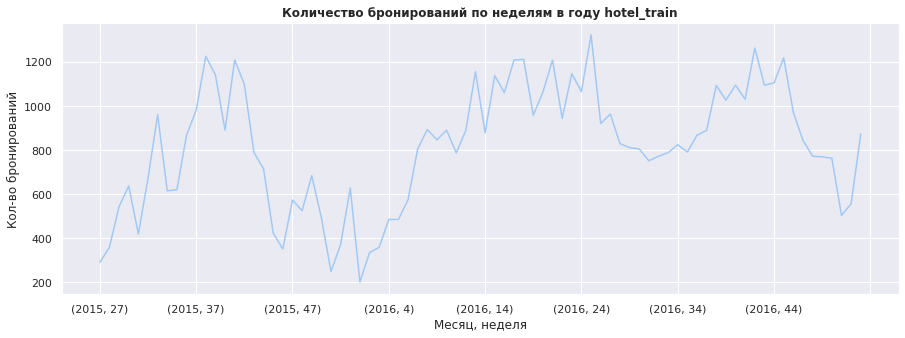

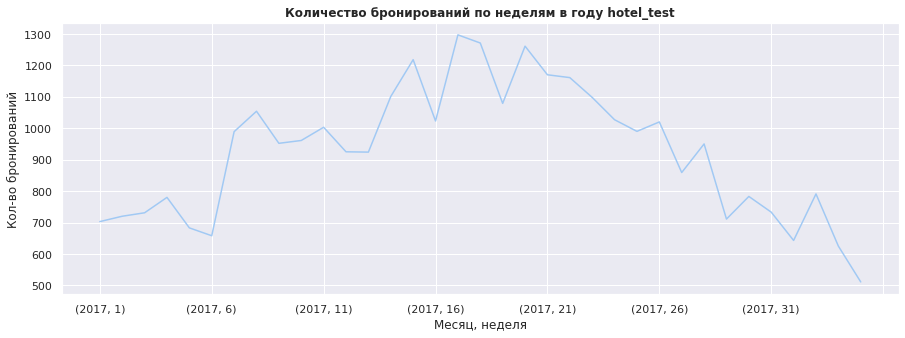

In [24]:
datas = [hotel_train, hotel_test]
AX = 0
for data in datas:
    data.pivot_table(index=['arrival_date_year', 'arrival_date_week_number'],
                            values='is_canceled', aggfunc='count').plot(legend=None)
    plt.xlabel('–ú–µ—Å—è—Ü, –Ω–µ–¥–µ–ª—è')
    plt.ylabel('–ö–æ–ª-–≤–æ –±—Ä–æ–Ω–∏—Ä–æ–≤–∞–Ω–∏–π')
    plt.title(f'–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –±—Ä–æ–Ω–∏—Ä–æ–≤–∞–Ω–∏–π –ø–æ –Ω–µ–¥–µ–ª—è–º –≤ –≥–æ–¥—É {titles[AX]}', fontweight="bold")
    AX += 1
    plt.show()

–ö–∞–∫ –≤–∏–¥–∏–º, –ø–∏–∫ –±—Ä–æ–Ω–∏—Ä–æ–≤–∞–Ω–∏–π –ø—Ä–∏—Ö–æ–¥–∏—Ç—Å—è –Ω–∞ —Å–µ—Ä–µ–¥–∏–Ω—É –≥–æ–¥–∞, —Ç–æ–≥–¥–∞ –∫–∞–∫ –≤ –Ω–∞—á–∞–ª–µ –∏ –≤ –∫–æ–Ω—Ü–µ –≤–æ–∑–º–æ–∂–Ω—ã —Å–Ω–∏–∂–µ–Ω–∏—è –∏–∑-–∑–∞ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–∏. –û–∂–∏–≤–ª–µ–Ω–∏–µ –º–æ–∂–µ—Ç –Ω–∞–±–ª—é–¥–∞—Ç—å—Å—è –∫ –ù–æ–≤–æ–º—É –ì–æ–¥—É.

In [25]:
def distribution_plots(data, name, title): #–°–æ–∑–¥–∞–¥–∏–º —Ñ—É–Ω–∫—Ü–∏–∏ –¥–ª—è –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∏ —è—â–∏–∫–∞ —Å —É—Å–∞–º–∏
    fig, ax = plt.subplots(1, 2)
    fig.suptitle('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ ' + name, fontweight='bold', fontsize=20)
    sns.distplot(data, ax=ax[0])
    ax[0].set_ylabel('–ü–ª–æ—Ç–Ω–æ—Å—Ç—å')
    ax[0].set_title(title, fontsize=18)
    
    sns.boxplot(data, ax=ax[1])
    ax[1].set_title(title, fontsize=18)
    plt.show()
def distribution(data, name):
    columns = [i for i in hotel_train.columns if (hotel_train[i].nunique() > 2) & (hotel_train[i].dtypes != 'object')]
    for column in columns:
        distribution_plots(data[column], name, column)

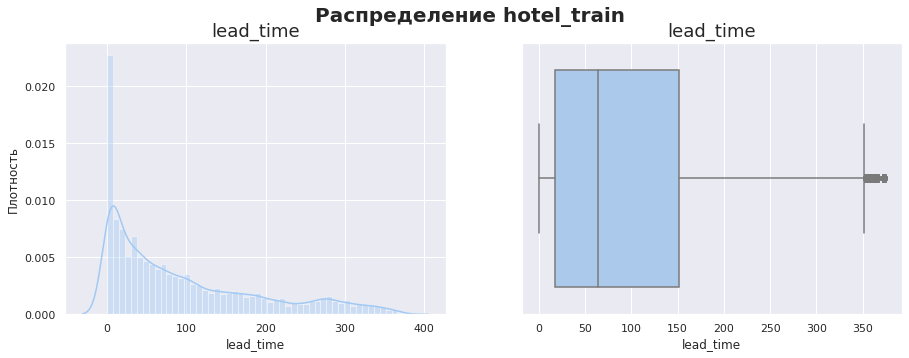

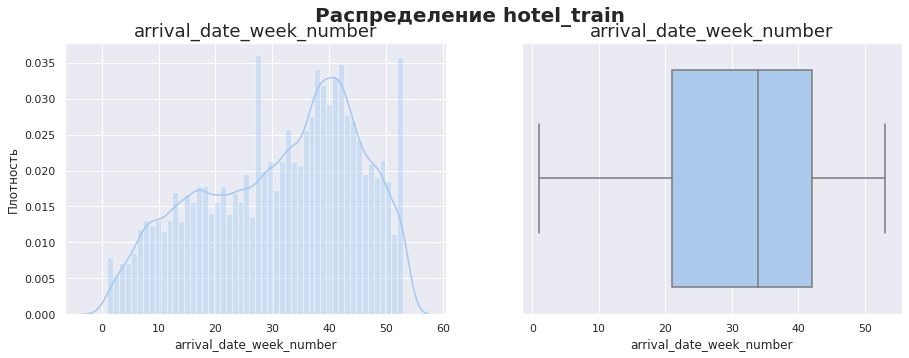

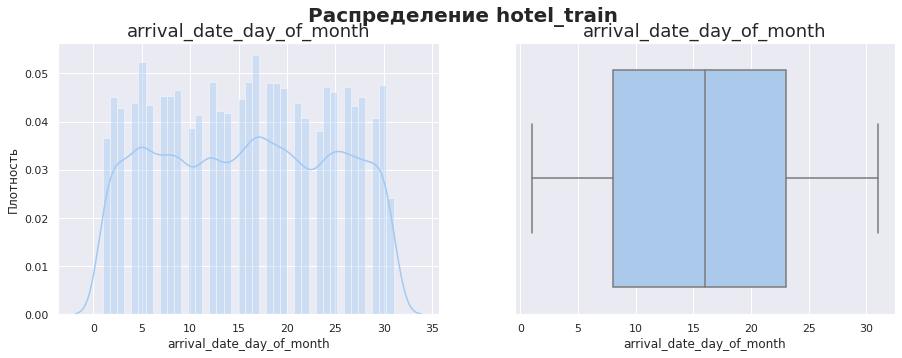

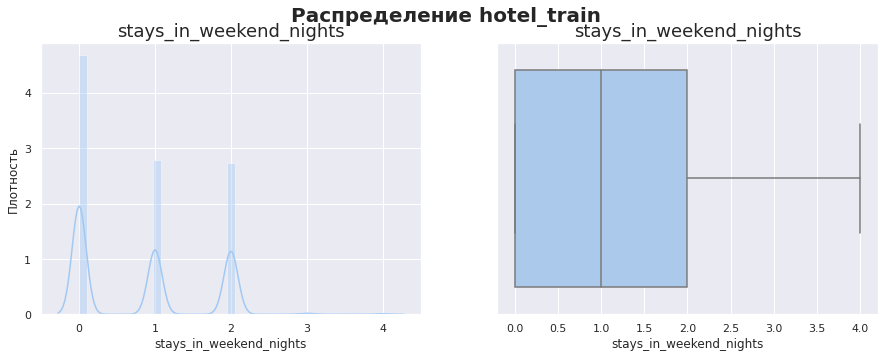

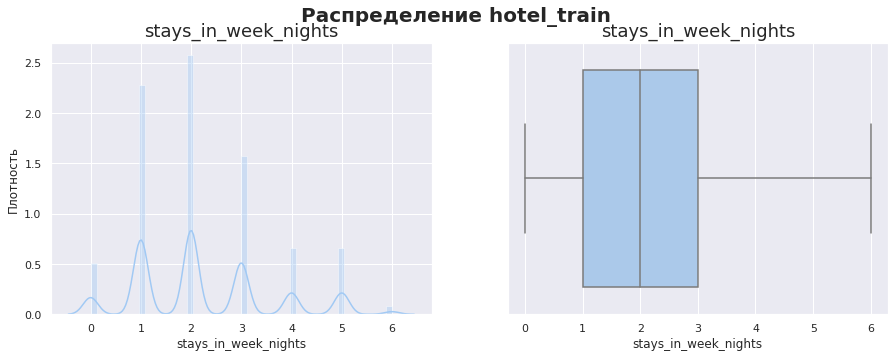

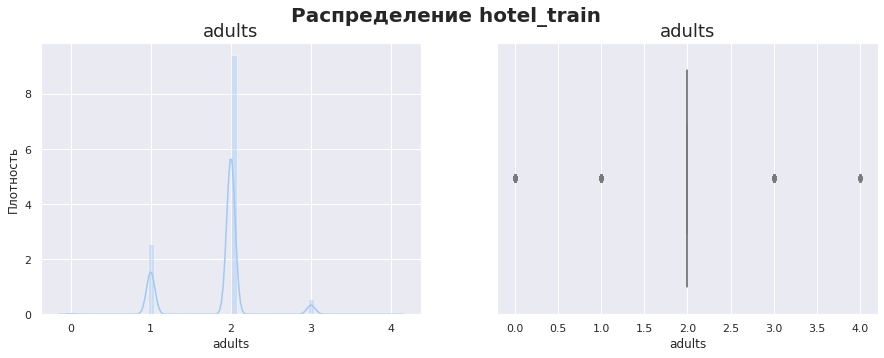

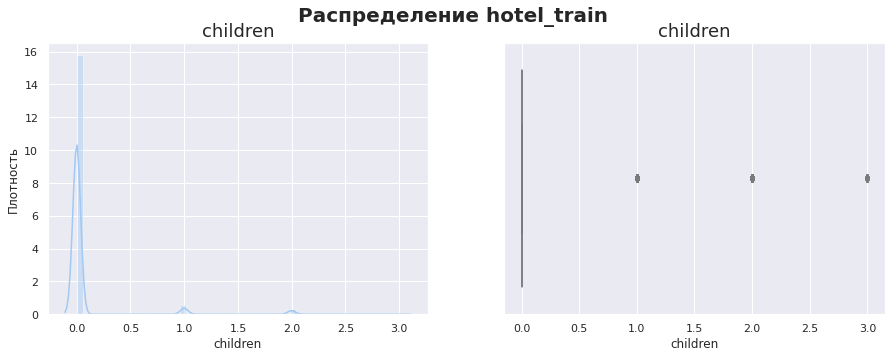

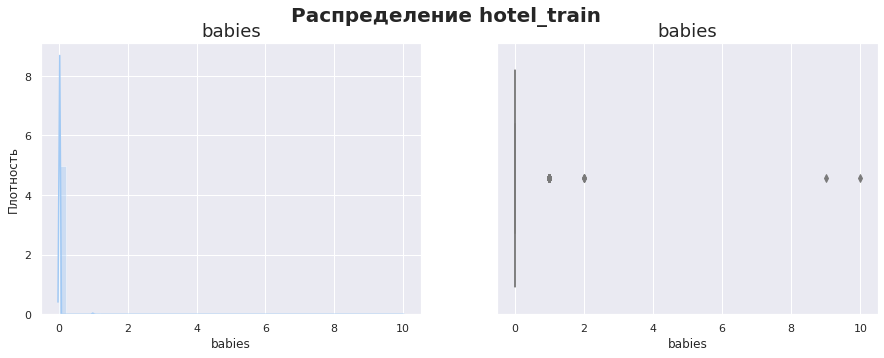

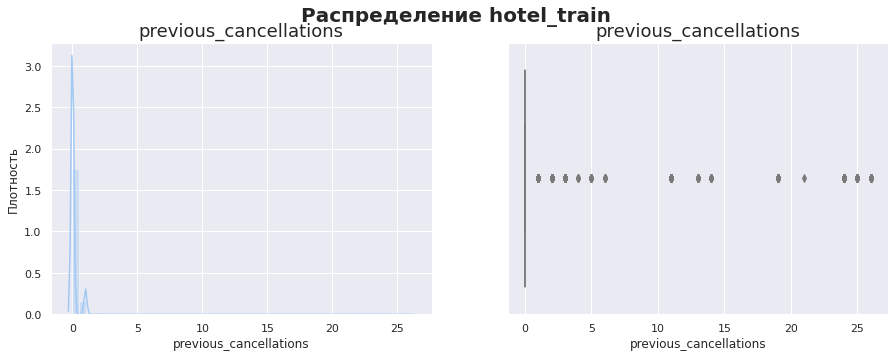

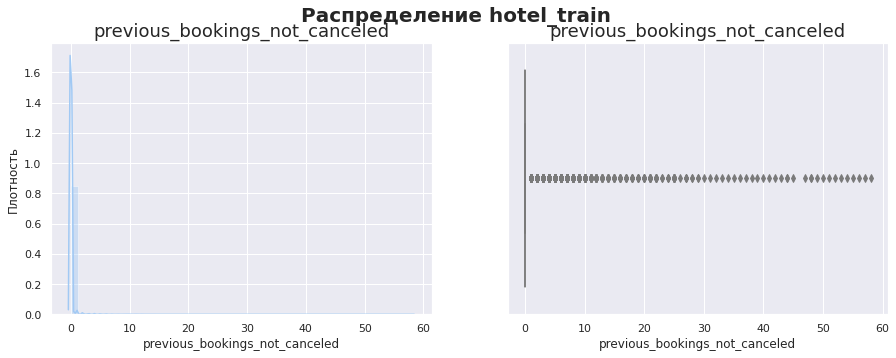

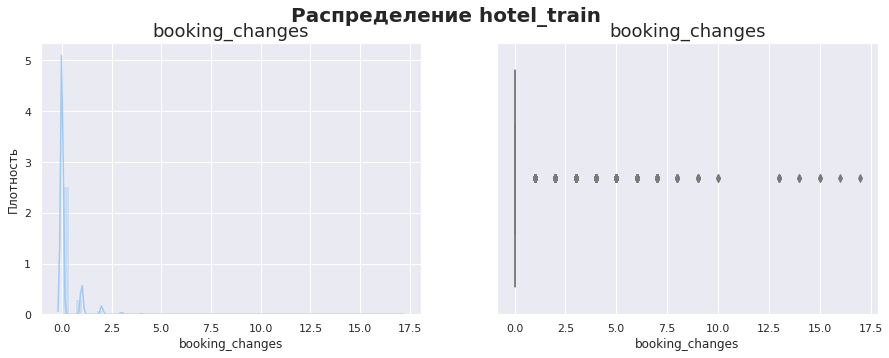

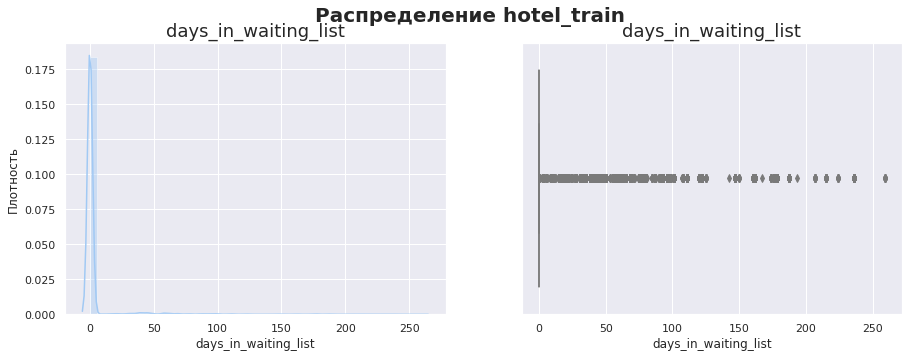

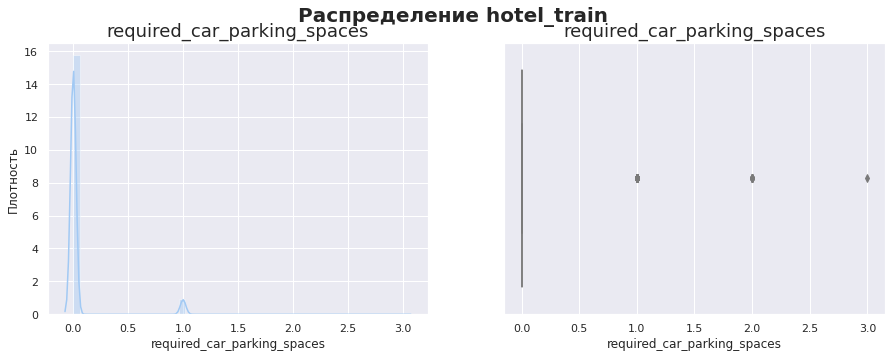

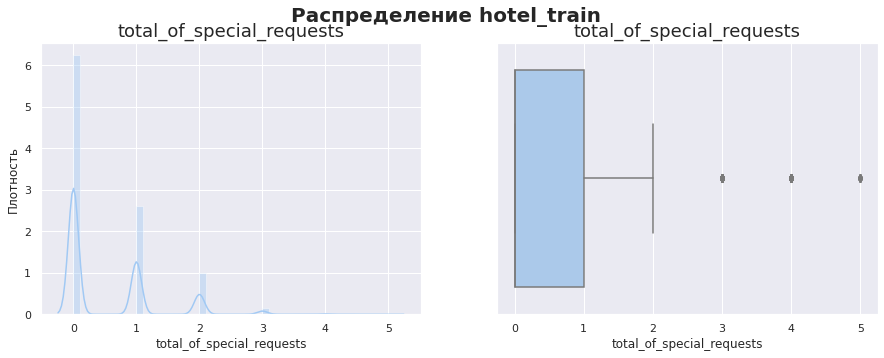

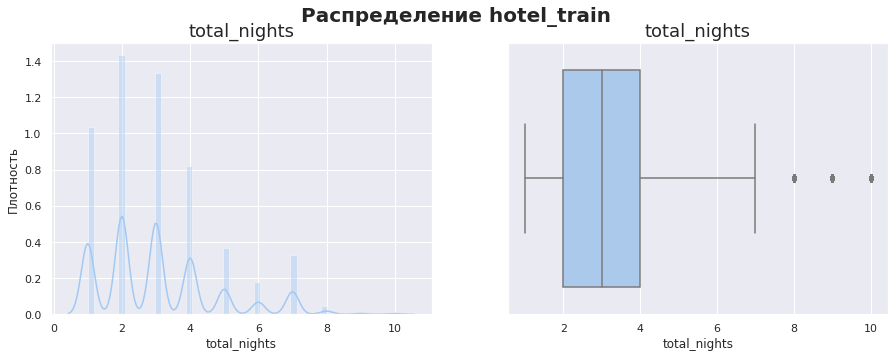

In [26]:
distribution(hotel_train, 'hotel_train')

–°—Ç–æ–ª–±–µ—Ü —Å –Ω–µ–ø—Ä–µ—Ä—ã–≤–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ lead_time –∏–º–µ–µ—Ç –ª–æ–≥–Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∏ –≤—ã–±—Ä–æ—Å—ã. –í–æ–∑–º–æ–∂–Ω–æ, –∏—Ö —Å—Ç–æ–∏—Ç —É–¥–∞–ª–∏—Ç—å. –¢–∞–∫–∂–µ —Å—Ç–æ–∏—Ç —Å–∫–æ—Ä—Ä–µ–∫—Ç–∏—Ä–æ–≤–∞—Ç—å —Å—Ç–æ–ª–±–µ—Ü total_nights. –í –¥—Ä—É–≥–∏—Ö —Å—Ç–æ–ª–±—Ü–∞—Ö —Ç–∞–∫–∂–µ –µ—Å—Ç—å –∏—Å–∫–∞–∂–µ–Ω–∏—è, –∫–æ—Ç–æ—Ä—ã–µ —è–≤–ª—è—é—Ç—Å—è –Ω–æ—Ä–º–æ–π. –ò—Ö –º—ã —Ç—Ä–æ–≥–∞—Ç—å –Ω–µ –±—É–¥–µ–º.

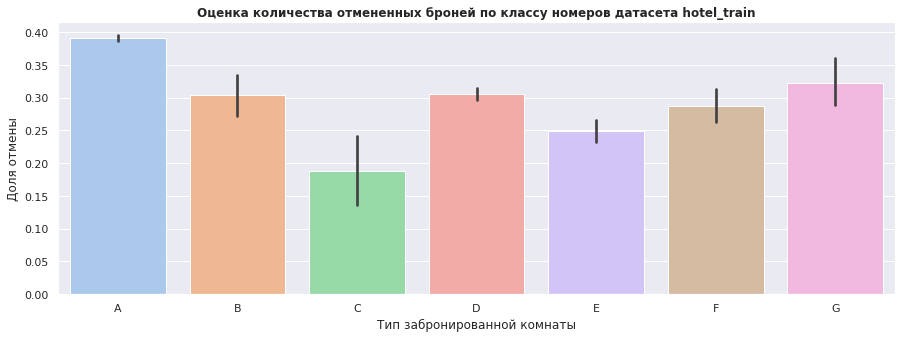

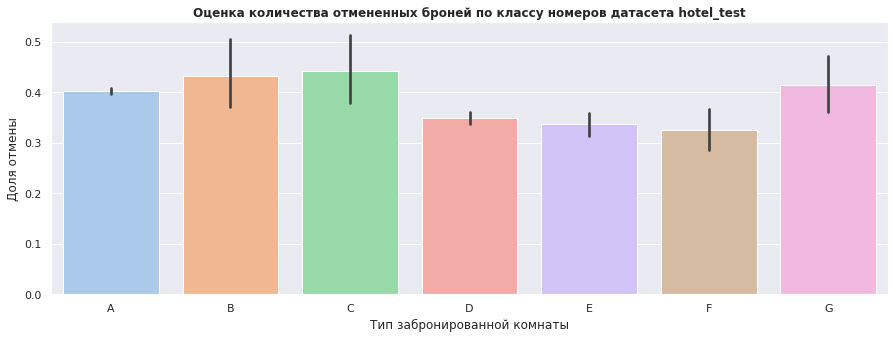

In [27]:
datas = [hotel_train, hotel_test]
AX = 0
for data in datas:
    sns.barplot(data=data, x='reserved_room_type', y='is_canceled', order = ['A','B','C','D','E','F','G'])
    plt.title(f'–û—Ü–µ–Ω–∫–∞ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –æ—Ç–º–µ–Ω–µ–Ω–Ω—ã—Ö –±—Ä–æ–Ω–µ–π –ø–æ –∫–ª–∞—Å—Å—É –Ω–æ–º–µ—Ä–æ–≤ –¥–∞—Ç–∞—Å–µ—Ç–∞ {titles[AX]}', fontweight="bold")
    plt.xlabel('–¢–∏–ø –∑–∞–±—Ä–æ–Ω–∏—Ä–æ–≤–∞–Ω–Ω–æ–π –∫–æ–º–Ω–∞—Ç—ã')
    plt.ylabel('–î–æ–ª—è –æ—Ç–º–µ–Ω—ã')
    AX += 1
    plt.show()

–ö–∞–∫ –≤–∏–¥–∏–º, –≤ 2017 –≥–æ–¥—É (—Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–π –¥–∞—Ç–∞—Å–µ—Ç) –±—ã–ª–æ –º–Ω–æ–≥–æ –æ—Ç–º–µ–Ω –ø–æ –∫–ª–∞—Å—Å—É –í, D, F –∏ G. –ù–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ –º–Ω–æ–≥–æ –æ—Ç–º–µ–Ω –ø–æ B, C, G. –ü—Ä–∏–∑–Ω–∞–∫ –ê —É –Ω–∞—Å —Å—Ç–∞–±–∏–ª—å–Ω–æ –≤ —Ç–æ–ø–µ –ø–æ –æ—Ç–º–µ–Ω–∞–º. –ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ç–∞–∫–æ–π –ø—Ä–∏–∑–Ω–∞–∫, –∫–∞–∫ required_car_parking_spaces, —Ç–∞–º –∑–∞–º–µ—á–µ–Ω–∞ –≤—ã—Å–æ–∫–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è —Å —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ–º –±—Ä–æ–Ω–∏—Ä–æ–≤–∞–Ω–∏—è –Ω–æ–º–µ—Ä–∞.

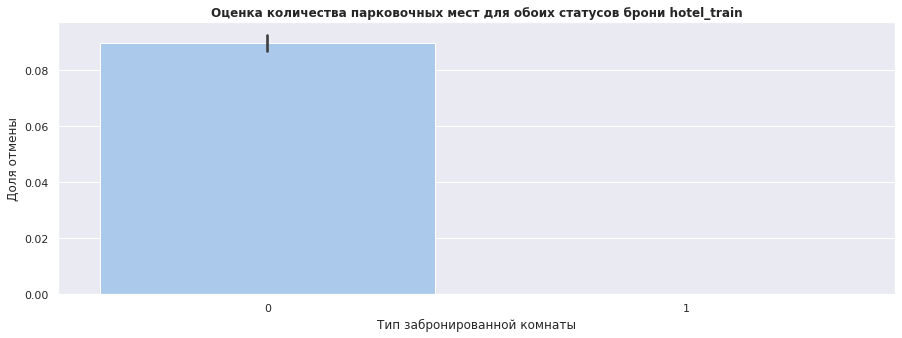

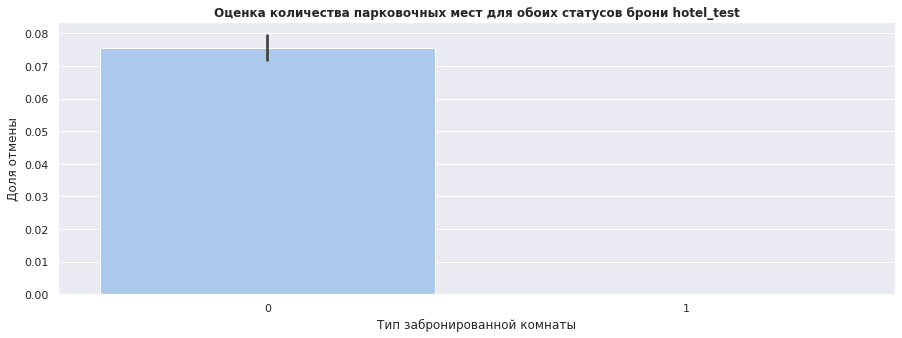

In [28]:
datas = [hotel_train, hotel_test]
AX = 0
for data in datas:
    sns.barplot(x=data['is_canceled'], y=data['required_car_parking_spaces'])
    plt.title(f'–û—Ü–µ–Ω–∫–∞ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –ø–∞—Ä–∫–æ–≤–æ—á–Ω—ã—Ö –º–µ—Å—Ç –¥–ª—è –æ–±–æ–∏—Ö —Å—Ç–∞—Ç—É—Å–æ–≤ –±—Ä–æ–Ω–∏ {titles[AX]}', fontweight="bold")
    plt.xlabel('–¢–∏–ø –∑–∞–±—Ä–æ–Ω–∏—Ä–æ–≤–∞–Ω–Ω–æ–π –∫–æ–º–Ω–∞—Ç—ã')
    plt.ylabel('–î–æ–ª—è –æ—Ç–º–µ–Ω—ã')
    AX += 1
    plt.show()

–¢–µ, –∫—Ç–æ –±—Ä–æ–Ω–∏—Ä—É–µ—Ç –ø–∞—Ä–∫–æ–≤–æ—á–Ω—ã–µ –º–µ—Å—Ç–∞ –ø–æ–¥ –∞–≤—Ç–æ, –ø–æ—á—Ç–∏ –Ω–µ –æ—Ç–º–µ–Ω—è—é—Ç –±—Ä–æ–Ω–∏—Ä–æ–≤–∞–Ω–∏–µ –∫–æ–º–Ω–∞—Ç.

# –û—Å–Ω–æ–≤–Ω—ã–µ –≤—ã–≤–æ–¥—ã

- –û—Ç–º–µ–Ω—è–µ—Ç—Å—è 37-39 % –±—Ä–æ–Ω–∏.
- –ú—ã –Ω–∞–±–ª—é–¥–∞–µ–º –Ω–µ–∫–∏–π –¥–∏—Å–±–∞–ª–∞–Ω—Å —Ü–µ–ª–µ–≤–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞, –∫–æ—Ç–æ—Ä—ã–π –Ω—É–∂–Ω–æ –≤ –¥–∞–ª—å–Ω–µ–π—à–µ–º —É—Ä–∞–≤–Ω—è—Ç—å, —Ö–æ—Ç—è –æ–Ω –Ω–µ —è–≤–ª—è–µ—Ç—Å—è –∫—Ä–∏—Ç–∏—á–Ω—ã–º.
- –û—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω–æ (–ø—Ä—è–º–∞—è –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å) –Ω–∞ —Å–∏—Ç—É–∞—Ü–∏—é –æ–∫–∞–∑—ã–≤–∞—é—Ç —Ç–∞–∫–∏–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏, –∫–∞–∫ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–Ω–µ–π –º–µ–∂–¥—É –¥–∞—Ç–æ–π –±—Ä–æ–Ω–∏—Ä–æ–≤–∞–Ω–∏—è –∏ –¥–∞—Ç–æ–π –ø—Ä–∏–±—ã—Ç–∏—è, –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤–∑—Ä–æ—Å–ª—ã—Ö –ø–æ—Å—Ç–æ—è–ª—å—Ü–µ–≤, –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–Ω–µ–π –æ–∂–∏–¥–∞–Ω–∏—è –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–µ–Ω–∏—è, –Ω–µ–¥–µ–ª—è –∑–∞–µ–∑–¥–∞. –ì—Ä–∞—Ñ–∞ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–º–µ–Ω–µ–Ω–Ω—ã—Ö –∑–∞–∫–∞–∑–æ–≤ —É –∫–ª–∏–µ–Ω—Ç–∞ –≤ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ –∏–º–µ–µ—Ç –ø—Ä—è–º—É—é –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Å –æ—Ç–º–µ–Ω–æ–π –±—Ä–æ–Ω–∏—Ä–æ–≤–∞–Ω–∏—è, –Ω–æ –≤–Ω–µ–∑–∞–ø–Ω–æ –≤ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ - –æ–±—Ä–∞—Ç–Ω—É—é –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å. –í–æ–∑–º–æ–∂–Ω–æ, –∑–∞ 2017 –≥–æ–¥ —É –Ω–∞—Å –∏–º–µ—é—Ç—Å—è –Ω–µ–ø–æ–ª–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –ø–æ —ç—Ç–æ–π –≥—Ä–∞—Ñ–µ.
- –ü–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ –Ω–∞ —Å–∏—Ç—É–∞—Ü–∏—é —Å –æ—Ç–º–µ–Ω–æ–π –±—Ä–æ–Ω–∏ –≤–ª–∏—è—é—Ç —Ç–∞–∫–∏–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –∫–∞–∫ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–ø–µ—Ü–∏–∞–ª—å–Ω—ã—Ö –æ—Ç–º–µ—Ç–æ–∫, –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç—å –º–µ—Å—Ç–∞ –¥–ª—è –∞–≤—Ç–æ–º–æ–±–∏–ª—è, –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–∑–º–µ–Ω–µ–Ω–∏–π –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –∑–∞–∫–∞–∑–∞, —Ä–µ–≥—É–ª—è—Ä–Ω–æ—Å—Ç—å –ø–æ—Å–µ—â–µ–Ω–∏—è –≥–æ—Å—Ç–µ–º –æ—Ç–µ–ª—è –∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥—ë–Ω–Ω—ã—Ö –∑–∞–∫–∞–∑–æ–≤ —É –∫–ª–∏–µ–Ω—Ç–∞.
- –ü–∏–∫ –±—Ä–æ–Ω–∏—Ä–æ–≤–∞–Ω–∏–π –ø—Ä–∏—Ö–æ–¥–∏—Ç—Å—è –Ω–∞ —Å–µ—Ä–µ–¥–∏–Ω—É –≥–æ–¥–∞, —Ç–æ–≥–¥–∞ –∫–∞–∫ –≤ –Ω–∞—á–∞–ª–µ –∏ –≤ –∫–æ–Ω—Ü–µ –≤–æ–∑–º–æ–∂–Ω—ã —Å–Ω–∏–∂–µ–Ω–∏—è –∏–∑-–∑–∞ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–∏. –û–∂–∏–≤–ª–µ–Ω–∏–µ –º–æ–∂–µ—Ç –Ω–∞–±–ª—é–¥–∞—Ç—å—Å—è –∫ –ù–æ–≤–æ–º—É –ì–æ–¥—É.
- –°—Ç–æ–ª–±–µ—Ü —Å –Ω–µ–ø—Ä–µ—Ä—ã–≤–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ lead_time –∏–º–µ–µ—Ç –ª–æ–≥–Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∏ –≤—ã–±—Ä–æ—Å—ã. –ò–º–µ–µ—Ç —Å—Ä–µ–¥–Ω–∏–π –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å 97,5. –≠—Ç–æ—Ç –ø—Ä–∏–∑–Ω–∞–∫ –±–æ–ª—å—à–µ –≤—Å–µ–≥–æ –∫–æ—Ä—Ä–µ–ª–∏—Ä—É–µ—Ç —Å —Ü–µ–ª–µ–≤—ã–º.
- –¢–µ, –∫—Ç–æ –±—Ä–æ–Ω–∏—Ä—É–µ—Ç –ø–∞—Ä–∫–æ–≤–æ—á–Ω—ã–µ –º–µ—Å—Ç–∞ –ø–æ–¥ –∞–≤—Ç–æ, –ø–æ—á—Ç–∏ –Ω–µ –æ—Ç–º–µ–Ω—è—é—Ç –±—Ä–æ–Ω–∏—Ä–æ–≤–∞–Ω–∏–µ –∫–æ–º–Ω–∞—Ç.
- –ö–ª–∞—Å—Å –Ω–æ–º–µ—Ä–æ–≤ A (–æ—Å–æ–±–µ–Ω–Ω–æ), –í, –° –∏ G —Ç—Ä–∞–¥–∏—Ü–∏–æ–Ω–Ω–æ –Ω–∞—Ö–æ–¥–∏—Ç—Å—è –≤ —Ç–æ–ø–µ –ø–æ –æ—Ç–º–µ–Ω–µ –±—Ä–æ–Ω–µ–π, —Ç–æ–≥–¥–∞ –∫–∞–∫ E –∏ F –ø–æ–¥–≤–µ—Ä–∂–µ–Ω—ã –æ—Ç–º–µ–Ω–µ –º–µ–Ω—å—à–µ –≤—Å–µ–≥–æ.

### –®–∞–≥ 3. –§–æ—Ä–º—É–ª–∏—Ä–æ–≤–∫–∞ ML-–∑–∞–¥–∞—á–∏ –Ω–∞ –æ—Å–Ω–æ–≤–µ –±–∏–∑–Ω–µ—Å-–∑–∞–¥–∞—á–∏

–û—Å–Ω–æ–≤–Ω–∞—è –±–∏–∑–Ω–µ—Å-–º–µ—Ç—Ä–∏–∫–∞ –¥–ª—è –ª—é–±–æ–π —Å–µ—Ç–∏ –æ—Ç–µ–ª–µ–π ‚Äî –µ—ë –ø—Ä–∏–±—ã–ª—å. –ü—Ä–∏–±—ã–ª—å –æ—Ç–µ–ª—è ‚Äî —ç—Ç–æ —Ä–∞–∑–Ω–∏—Ü–∞ –º–µ–∂–¥—É —Å—Ç–æ–∏–º–æ—Å—Ç—å—é –Ω–æ–º–µ—Ä–∞ –∑–∞ –≤—Å–µ –Ω–æ—á–∏ –∏ –∑–∞—Ç—Ä–∞—Ç—ã –Ω–∞ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ: –∫–∞–∫ –ø—Ä–∏ –ø–æ–¥–≥–æ—Ç–æ–≤–∫–µ –Ω–æ–º–µ—Ä–∞, —Ç–∞–∫ –∏ –ø—Ä–∏ –ø—Ä–æ–∂–∏–≤–∞–Ω–∏–∏ –ø–æ—Å—Ç–æ—è–ª—å—Ü–∞.

–í –æ—Ç–µ–ª–µ –µ—Å—Ç—å –Ω–µ—Å–∫–æ–ª—å–∫–æ —Ç–∏–ø–æ–≤ –Ω–æ–º–µ—Ä–æ–≤. –í –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç —Ç–∏–ø–∞ –Ω–æ–º–µ—Ä–∞ –Ω–∞–∑–Ω–∞—á–∞–µ—Ç—Å—è —Å—Ç–æ–∏–º–æ—Å—Ç—å –∑–∞ –æ–¥–Ω—É –Ω–æ—á—å. –ï—Å—Ç—å —Ç–∞–∫–∂–µ –∑–∞—Ç—Ä–∞—Ç—ã –Ω–∞ —É–±–æ—Ä–∫—É. –ï—Å–ª–∏ –∫–ª–∏–µ–Ω—Ç —Å–Ω—è–ª –Ω–æ–º–µ—Ä –Ω–∞–¥–æ–ª–≥–æ, —Ç–æ —É–±–∏—Ä–∞—é—Ç—Å—è –∫–∞–∂–¥—ã–µ –¥–≤–∞ –¥–Ω—è.

–°—Ç–æ–∏–º–æ—Å—Ç—å –Ω–æ–º–µ—Ä–æ–≤ –æ—Ç–µ–ª—è:

- –∫–∞—Ç–µ–≥–æ—Ä–∏—è A: –∑–∞ –Ω–æ—á—å ‚Äî 1 000, —Ä–∞–∑–æ–≤–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ ‚Äî 400;
- –∫–∞—Ç–µ–≥–æ—Ä–∏—è B: –∑–∞ –Ω–æ—á—å ‚Äî 800, —Ä–∞–∑–æ–≤–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ ‚Äî 350;
- –∫–∞—Ç–µ–≥–æ—Ä–∏—è C: –∑–∞ –Ω–æ—á—å ‚Äî 600, —Ä–∞–∑–æ–≤–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ ‚Äî 350;
- –∫–∞—Ç–µ–≥–æ—Ä–∏—è D: –∑–∞ –Ω–æ—á—å ‚Äî 550, —Ä–∞–∑–æ–≤–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ ‚Äî 150;
- –∫–∞—Ç–µ–≥–æ—Ä–∏—è E: –∑–∞ –Ω–æ—á—å ‚Äî 500, —Ä–∞–∑–æ–≤–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ ‚Äî 150;
- –∫–∞—Ç–µ–≥–æ—Ä–∏—è F: –∑–∞ –Ω–æ—á—å ‚Äî 450, —Ä–∞–∑–æ–≤–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ ‚Äî 150;
- –∫–∞—Ç–µ–≥–æ—Ä–∏—è G: –∑–∞ –Ω–æ—á—å ‚Äî 350, —Ä–∞–∑–æ–≤–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ ‚Äî 150.

–í —Ü–µ–Ω–æ–≤–æ–π –ø–æ–ª–∏—Ç–∏–∫–µ –æ—Ç–µ–ª—è –∏—Å–ø–æ–ª—å–∑—É—é—Ç—Å—è —Å–µ–∑–æ–Ω–Ω—ã–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã: –≤–µ—Å–Ω–æ–π –∏ –æ—Å–µ–Ω—å—é —Ü–µ–Ω—ã –ø–æ–≤—ã—à–∞—é—Ç—Å—è –Ω–∞ 20%, –ª–µ—Ç–æ–º ‚Äî –Ω–∞ 40%. –£–±—ã—Ç–∫–∏ –æ—Ç–µ–ª—è –≤ —Å–ª—É—á–∞–µ –æ—Ç–º–µ–Ω—ã –±—Ä–æ–Ω–∏ –Ω–æ–º–µ—Ä–∞ ‚Äî —ç—Ç–æ —Å—Ç–æ–∏–º–æ—Å—Ç—å –æ–¥–Ω–æ–π —É–±–æ—Ä–∫–∏ –∏ –æ–¥–Ω–æ–π –Ω–æ—á–∏ —Å —É—á—ë—Ç–æ–º —Å–µ–∑–æ–Ω–Ω–æ–≥–æ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞.

–ù–∞ —Ä–∞–∑—Ä–∞–±–æ—Ç–∫—É —Å–∏—Å—Ç–µ–º—ã –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏—è –∑–∞–ª–æ–∂–µ–Ω –±—é–¥–∂–µ—Ç ‚Äî 400 000. –ü—Ä–∏ —ç—Ç–æ–º –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ —É—á–µ—Å—Ç—å, —á—Ç–æ –≤–Ω–µ–¥—Ä–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –¥–æ–ª–∂–Ω–æ –æ–∫—É–ø–∏—Ç—å—Å—è –∑–∞ —Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥. –ó–∞—Ç—Ä–∞—Ç—ã –Ω–∞ —Ä–∞–∑—Ä–∞–±–æ—Ç–∫—É –¥–æ–ª–∂–Ω—ã –±—ã—Ç—å –º–µ–Ω—å—à–µ —Ç–æ–π –≤—ã—Ä—É—á–∫–∏, –∫–æ—Ç–æ—Ä—É—é —Å–∏—Å—Ç–µ–º–∞ –ø—Ä–∏–Ω–µ—Å—ë—Ç –∫–æ–º–ø–∞–Ω–∏–∏.

–ü—Ä–∏–±—ã–ª—å–Ω–æ—Å—Ç—å –∑–∞ –æ—Ç—á—ë—Ç–Ω—ã–π –ø–µ—Ä–∏–æ–¥

–î–ª—è –Ω–∞—á–∞–ª–∞ —Å–æ–æ—Ç–Ω–µ—Å–µ–º –¥–∞–Ω–Ω—ã–µ –∏–∑ –Ω–∞—à–∏—Ö –¥–∞—Ç–∞—Å–µ—Ç–æ–≤ —Å –±–∏–∑–Ω–µ—Å-–º–µ—Ç—Ä–∏–∫–∞–º–∏.

In [29]:
#–°–æ–∑–¥–∞–¥–∏–º –æ—Ç–¥–µ–ª—å–Ω—ã–π –¥—Ñ —Å –Ω—É–∂–Ω—ã–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏
df_for_profit = hotel_test[['is_canceled', 'arrival_date_month', 'reserved_room_type', 'total_nights']]
df_for_profit.head()

is_canceled arrival_date_month reserved_room_type  total_nights
0            1            January                  A             1
1            1            January                  A             4
2            1            January                  A             4
3            1            January                  A             4
4            1            January                  A             7

In [30]:
#–î–æ–±–∞–≤–∏–º –∫ –ø–æ–ª—É—á–∏–≤—à–µ–π—Å—è —Ç–∞–±–ª–∏—Ü–µ –∑–Ω–∞—á–µ–Ω–∏—è —Å—Ç–æ–∏–º–æ—Å—Ç–∏ –∫–æ–º–Ω–∞—Ç –∏ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏—è
room_dict = pd.DataFrame({'reserved_room_type' : [i for i in sorted(df_for_profit.reserved_room_type.unique())],
                         'price_per_night' : [1000, 800, 600, 550, 500, 450, 350],
                         'service_price' : [400, 350, 350, 150, 150, 150, 150]})
df_for_profit = df_for_profit.merge(room_dict, on='reserved_room_type', how='left')

In [31]:
#–î–æ–±–∞–≤–∏–º –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –ø–æ —Å–µ–∑–æ–Ω—É
month_dict = pd.DataFrame({'arrival_date_month' : [i for i in df_for_profit.arrival_date_month.unique()],
                          'koeff' : [1, 1, 1.2, 1.2, 1.2, 1.4, 1.4, 1.4]})
df_for_profit = df_for_profit.merge(month_dict, on='arrival_date_month', how='left')
df_for_profit

is_canceled arrival_date_month reserved_room_type  total_nights  \
0                1            January                  A             1   
1                1            January                  A             4   
2                1            January                  A             4   
3                1            January                  A             4   
4                1            January                  A             7   
...            ...                ...                ...           ...   
32400            0             August                  A             6   
32401            0             August                  A             7   
32402            0             August                  A             7   
32403            0             August                  D             7   
32404            0             August                  A             7   

       price_per_night  service_price  koeff  
0                 1000            400    1.0  
1                 1000            400    1.0  
2                 1000            400    1.0  
3                 1000            400    1.0  
4                 1000            400    1.0  
...                ...            ...    ...  
32400             1000            400    1.4  
32401             1000            400    1.4  
32402             1000            400    1.4  
32403              550            150    1.4  
32404             1000            400    1.4  

[32405 rows x 7 columns]

In [32]:
#–î–∞–ª–µ–µ —Å–æ–∑–¥–∞–¥–∏–º —Ñ—É–Ω–∫—Ü–∏—é –¥–ª—è —Ä–∞—Å—Å—á–µ—Ç–∞ –ø—Ä–∏–±—ã–ª–∏ –∏ —É–±—ã—Ç–∫–∞ –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –æ—Ç–º–µ–Ω—ã –±—Ä–æ–Ω–∏
def profit(data):
    if data['is_canceled'] == 0:
        income = data['price_per_night'] * data['koeff'] * data['total_nights']
        expenses = data['service_price'] * (1 + data['total_nights'] // 2)
    else:
        income = 0
        expenses = data['service_price'] + (data['price_per_night'] * data['koeff'])
    profit = income - expenses
    return profit

In [33]:
df_for_profit['total_profit'] = df_for_profit.apply(profit, axis=1)

In [34]:
display(df_for_profit)
profit_without_deposite = df_for_profit['total_profit'].sum()
print('–ü—Ä–∏–±—ã–ª—å —Å —è–Ω–≤–∞—Ä—è –ø–æ –∞–≤–≥—É—Å—Ç 2017 –≥. –±–µ–∑ –¥–µ–ø–æ–∑–∏—Ç–∞ —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç:', profit_without_deposite, '—Ä—É–±.')

is_canceled arrival_date_month reserved_room_type  total_nights  \
0                1            January                  A             1   
1                1            January                  A             4   
2                1            January                  A             4   
3                1            January                  A             4   
4                1            January                  A             7   
...            ...                ...                ...           ...   
32400            0             August                  A             6   
32401            0             August                  A             7   
32402            0             August                  A             7   
32403            0             August                  D             7   
32404            0             August                  A             7   

       price_per_night  service_price  koeff  total_profit  
0                 1000            400    1.0       -1400.0  
1                 1000            400    1.0       -1400.0  
2                 1000            400    1.0       -1400.0  
3                 1000            400    1.0       -1400.0  
4                 1000            400    1.0       -1400.0  
...                ...            ...    ...           ...  
32400             1000            400    1.4        6800.0  
32401             1000            400    1.4        8200.0  
32402             1000            400    1.4        8200.0  
32403              550            150    1.4        4790.0  
32404             1000            400    1.4        8200.0  

[32405 rows x 8 columns]

–ü—Ä–∏–±—ã–ª—å —Å —è–Ω–≤–∞—Ä—è –ø–æ –∞–≤–≥—É—Å—Ç 2017 –≥. –±–µ–∑ –¥–µ–ø–æ–∑–∏—Ç–∞ —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç: 32561070.0 —Ä—É–±.


–ò—Ç–∞–∫, –ø—Ä–∏–±—ã–ª—å –∑–∞ –æ—Ç—á–µ—Å—Ç–Ω—ã–π –ø–µ—Ä–∏–æ–¥ —É –Ω–∞—Å —Å–æ—Å—Ç–∞–≤–∏–ª–∞ 32_561_070 —Ä—É–±. –¢–µ–ø–µ—Ä—å –ø—Ä–∏–º–µ–º—Å—è –∑–∞ —Ä–∞–∑—Ä–∞–±–æ—Ç–∫—É ML –º–æ–¥–µ–ª–∏, –∫–æ—Ç–æ—Ä–∞—è –ø–æ–º–æ–∂–µ—Ç –Ω–∞–º –æ–∫—É–ø–∏—Ç—å –∑–∞—Ç—Ä–∞—Ç—ã –Ω–∞ —Ä–∞–∑—Ä–∞–±–æ—Ç–∫—É –º–æ–¥–µ–ª–∏ –∏ –µ–µ –≤–Ω–µ–¥—Ä–µ–Ω–∏–µ, –∞ —Ç–∞–∫–∂–µ –ø—Ä–∏–Ω–µ—Å—Ç–∏ –ø—Ä–∏–±—ã–ª—å. –î–ª—è —ç—Ç–æ–≥–æ –ø–æ–¥–≥–æ—Ç–æ–≤–∏–º –¥–∞–Ω–Ω—ã–µ.

# –ü–æ–¥–≥–æ—Ç–∞–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è ML

–°–æ–∑–¥–∞–¥–∏–º –∫–æ–ø–∏—é –Ω–∞—à–∏—Ö –¥–∞—Ç–∞—Å–µ—Ç–æ–≤, —á—Ç–æ–±—ã –Ω–µ –º–µ–Ω—è—Ç—å –Ω–∞—à–∏ –¥–∞–Ω–Ω—ã–µ –≤ –¥–∞–ª—å–Ω–µ–π—à–µ–º, –∏–∑ –∫–æ–ø–∏–π —É–¥–∞–ª–∏–º –≤—ã–±—Ä–æ—Å—ã, —Ä–∞–∑–¥–µ–ª–∏–º –Ω–∞ —Ñ–∏—á–∏ –∏ —Ç–∞—Ä–≥–µ—Ç, –∑–∞—Ç–µ–º –ø—Ä–µ–æ–±—Ä–∞–∑—É–µ–º.

–£–¥–∞–ª–∏–º –≤—ã–±—Ä–æ—Å—ã –∏–∑ —Å—Ç–æ–ª–±—Ü–æ–≤ lead_time –∏ total_nights, —á—Ç–æ–±—ã –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ –æ–±—É—á–∏—Ç—å –Ω–∞—à–∏ –º–æ–¥–µ–ª–∏.

In [35]:
#–î–µ–ª–∞–µ–º –∫–æ–ø–∏—é
hotel_train_trans = hotel_train.copy()

In [36]:
def remove_out(data, column): #–°–æ–∑–¥–∞–µ–º —Ñ—É–Ω–∫—Ü–∏—é –¥–ª—è —É–¥–∞–ª–µ–Ω–∏—è –≤—ã–±—Ä–æ—Å–æ–≤
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    upper = data.loc[data[column] >= (q3 + 1.5 * iqr)].index
    lower = data.loc[data[column] <= (q1 - 1.5 * iqr)].index
    data.drop(upper, inplace=True)
    data.drop(lower, inplace=True)

In [37]:
iter_rows = 0
while iter_rows != hotel_train_trans.shape[0]:
    iter_rows = hotel_train_trans.shape[0]
    remove_out(hotel_train_trans, 'total_nights')
    remove_out(hotel_train_trans, 'lead_time')

In [38]:
hotel_train_trans.shape

(53311, 24)

In [39]:
#–î–µ–ª–∏–º –≤—ã–±–æ—Ä–∫–∏
features_train, target_train = hotel_train_trans.drop(columns='is_canceled', axis=1), hotel_train_trans['is_canceled']
features_test, target_test = hotel_test.drop(columns='is_canceled', axis=1), hotel_test['is_canceled']

–ó–∞–º–µ—Ç–Ω–æ, —á—Ç–æ –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ —Å—Ç–æ–ª–±—Ü—ã, –∫–∞–∫, –Ω–∞–ø—Ä–∏–º–µ—Ä children –∏ babies –ª—É—á—à–µ –ø—Ä–∏–≤–µ—Å—Ç–∏ –∫ –±—É–ª–µ–≤—ã–º –∑–Ω–∞—á–µ–Ω–∏—è–º –¥–ª—è —Ç–æ–≥–æ, —á—Ç–æ–±—ã –ø–æ–¥—á–µ—Ä–∫–Ω—É—Ç—å –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é.

In [40]:
def category(value):
    if value == 0:
        return False
    else:
        return True
for data, column in [(features_train, 'babies'), (features_test, 'babies'), (features_train, 'children'), 
                     (features_test, 'children')]:
    data[column] = data[column].apply(category)

In [41]:
#–ü—Ä–∏–∑–Ω–∞–∫ arrival_date_year —É–¥–∞–ª–∏–º, —Ç–∫ –æ–Ω –Ω–µ –∫–æ—Ä—Ä–µ–ª–∏—Ä—É–µ—Ç —Å —Ü–µ–ª–µ–≤—ã–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏ –∏ –º–æ–∂–µ—Ç –±—ã—Ç—å –≤—ã—Ä–∞–∂–µ–Ω –æ–¥–Ω–∏–º —Å—Ç–æ–ª–±—Ü–æ–º
#arrival_date_week_number, —Ç–∞–∫ —á—Ç–æ –Ω–µ –±—É–¥–µ–º —Ä–∞–∑–º—ã–≤–∞—Ç—å –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏
features_train.drop(columns=['arrival_date_year', 'arrival_date_day_of_month', 'arrival_date_month', 'total_nights'], inplace=True)
features_test.drop(columns=['arrival_date_year', 'arrival_date_day_of_month', 'arrival_date_month', 'total_nights'], inplace=True)

–û—Ç–º–∞—Å—à—Ç–∞–±–∏—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ –¥–ª—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏

In [42]:
numeric = [*features_train.select_dtypes(exclude=['object']).columns]
numeric.remove('is_repeated_guest')
numeric.remove('babies')
numeric.remove('children')
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [43]:
binary = ce.BinaryEncoder()
binary.fit(features_train)
features_train = binary.transform(features_train)
features_test = binary.transform(features_test)

In [44]:
display(features_train)

lead_time  arrival_date_week_number  stays_in_weekend_nights  \
0      -0.930833                 -0.274580                -0.927239   
1      -0.821137                 -0.274580                -0.927239   
2      -1.040529                 -0.274580                -0.927239   
3      -0.899491                 -0.274580                -0.927239   
4       0.291491                 -0.274580                -0.927239   
...          ...                       ...                      ...   
65207   0.463870                  1.576742                 1.570590   
65208  -0.680100                  1.576742                 1.570590   
65209  -0.680100                  1.576742                 1.570590   
65210  -0.209975                  1.576742                 1.570590   
65211  -0.930833                  1.576742                 1.570590   

       stays_in_week_nights    adults  children  babies  meal_0  meal_1  \
0                 -0.856982 -1.627206     False   False       0       0   
1                  0.016266  0.359556     False   False       0       0   
2                  0.016266  0.359556     False   False       0       0   
3                  0.016266  0.359556     False   False       0       1   
4                  0.889513  0.359556     False   False       0       0   
...                     ...       ...       ...     ...     ...     ...   
65207              0.889513  0.359556     False   False       0       1   
65208              1.762760  0.359556     False   False       0       0   
65209              1.762760  0.359556     False   False       0       0   
65210              0.889513  0.359556     False   False       0       1   
65211              1.762760  0.359556     False   False       0       0   

       meal_2  country_0  country_1  country_2  country_3  country_4  \
0           1          0          0          0          0          0   
1           1          0          0          0          0          0   
2           1          0          0          0          0          0   
3           0          0          0          0          0          0   
4           1          0          0          0          0          0   
...       ...        ...        ...        ...        ...        ...   
65207       1          0          0          0          0          1   
65208       1          0          0          0          0          1   
65209       1          0          0          0          1          1   
65210       1          0          0          0          0          0   
65211       1          0          0          0          0          0   

       country_5  country_6  country_7  distribution_channel_0  \
0              0          0          1                       0   
1              0          0          1                       0   
2              0          1          0                       0   
3              0          1          0                       0   
4              0          1          0                       0   
...          ...        ...        ...                     ...   
65207          1          0          1                       0   
65208          1          0          0                       0   
65209          1          1          0                       0   
65210          1          0          1                       0   
65211          1          0          1                       0   

       distribution_channel_1  distribution_channel_2  is_repeated_guest  \
0                           0                       1                  0   
1                           1                       0                  0   
2                           0                       1                  0   
3                           0                       1                  0   
4                           1                       0                  0   
...                       ...                     ...                ...   
65207                       1                       0          

In [45]:
display(features_test)

lead_time  arrival_date_week_number  stays_in_weekend_nights  \
0       0.119112                 -2.125901                 0.321675   
1      -0.068938                 -2.125901                 1.570590   
2      -0.068938                 -2.125901                 1.570590   
3       0.072100                 -2.125901                 1.570590   
4       1.654853                 -2.125901                 1.570590   
...          ...                       ...                      ...   
32400   1.529486                  0.295058                 1.570590   
32401  -0.711441                  0.295058                 1.570590   
32402  -0.680100                  0.295058                 1.570590   
32403  -0.507721                  0.295058                 1.570590   
32404   0.667591                  0.295058                 1.570590   

       stays_in_week_nights    adults  children  babies  meal_0  meal_1  \
0                 -1.730229  0.359556     False   False       0       0   
1                  0.016266  0.359556     False   False       0       0   
2                  0.016266  0.359556     False   False       0       0   
3                  0.016266 -1.627206     False   False       0       0   
4                  2.636007  0.359556     False   False       0       0   
...                     ...       ...       ...     ...     ...     ...   
32400              1.762760  0.359556     False   False       0       0   
32401              2.636007  0.359556     False   False       0       0   
32402              2.636007  0.359556     False   False       0       0   
32403              2.636007  0.359556     False   False       0       0   
32404              2.636007  0.359556     False   False       0       0   

       meal_2  country_0  country_1  country_2  country_3  country_4  \
0           1          0          0          0          0          0   
1           1          0          0          1          0          1   
2           1          0          0          1          0          1   
3           1          0          0          0          0          0   
4           1          0          0          0          0          1   
...       ...        ...        ...        ...        ...        ...   
32400       1          0          0          0          0          1   
32401       1          0          0          0          0          1   
32402       1          0          0          0          0          1   
32403       1          0          0          0          0          1   
32404       1          0          0          0          0          0   

       country_5  country_6  country_7  distribution_channel_0  \
0              0          1          0                       0   
1              0          0          1                       0   
2              0          0          1                       0   
3              0          1          0                       0   
4              0          0          1                       0   
...          ...        ...        ...                     ...   
32400          0          0          0                       0   
32401          0          0          1                       0   
32402          0          0          1                       0   
32403          0          0          0                       0   
32404          0          0          1                       0   

       distribution_channel_1  distribution_channel_2  is_repeated_guest  \
0                           1                       0                  0   
1                           1                       0                  0   
2                           1                       0                  0   
3                           1                       0                  0   
4                           1                       0                  0   
...                       ...                     ...                ...   
32400                       1                       0          

–£–≤–µ–ª–∏—á–µ–Ω–∏–µ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏

–î–∞–Ω–Ω—ã–µ –≥–æ—Ç–æ–≤—ã, –ø—Ä–∏–∑–Ω–∞–∫–∏ —Ä–∞–∑–¥–µ–ª–µ–Ω—ã, –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω—ã. –°–¥–µ–ª–∞–ª–∏ –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ. –£–≤–µ–ª–∏—á–∏–º —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—É—é –≤—ã–±–æ—Ä–∫—É –∑–∞ —Å—á–µ—Ç –¥–æ–±–∞–≤–ª–µ–Ω–∏—è –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ –∏ –Ω–∞—á–Ω–µ–º —Å—Ç—Ä–æ–∏—Ç—å ML-–º–æ–¥–µ–ª–∏.

In [46]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_train, target_train = upsample(features_train, target_train, 2)

In [47]:
features_train.shape[0] / features_test.shape[0]

2.1794167566733527

In [48]:
target_train.value_counts()

0    35998
1    34626
Name: is_canceled, dtype: int64

### –®–∞–≥ 4. –†–∞–∑—Ä–∞–±–æ—Ç–∫–∞ –º–æ–¥–µ–ª–∏ ML

# –í—ã–±–æ—Ä –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏

–î–∞–ª–µ–µ –Ω—É–∂–Ω–æ –≤—ã–±—Ä–∞—Ç—å –∏–∑ –Ω–∏—Ö —Å–∞–º—É—é –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω—É—é, —Ç—É, –∫–æ—Ç–æ—Ä–∞—è —É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä—è–ª–∞ –±—ã –Ω–∞—à–∏–º —É—Å–ª–æ–≤–∏—è–º. –¶–µ–ª–µ–≤–æ–π –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å –¥–ª—è –Ω–∞—Å - recall - —Ç–∫ –∏–º–µ–Ω–Ω–æ –æ—Ç–∫–∞–∑–Ω–∏–∫–∏, –∫–æ—Ç–æ—Ä—ã–º –º–æ–¥–µ–ª—å –æ—à–∏–±–æ—á–Ω–æ –ø—Ä–∏—Å–≤–æ–∏—Ç –ª–æ–∂–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫, –ø—Ä–∏–Ω–µ—Å—É—Ç —É–±—ã—Ç–∫–∏ –æ—Ç–µ–ª—é.

<div class="alert alert-success">
<b>–û–¢–õ–ò–ß–ù–û! üëç</b>

–í–µ—Ä–Ω–æ, –º–æ–ª–æ–¥–µ—Ü! –ú–µ—Ç—Ä–∏–∫–∞, –∫–æ—Ç–æ—Ä—É—é –º—ã –±—É–¥–µ–º "–≤—ã—Ä–∞—â–∏–≤–∞—Ç—å" –≤—ã–±—Ä–∞–Ω–∞!
</div>

In [81]:
#–°—Ç—Ä–æ–∏–º –¥–∞–º–º–∏ –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ –Ω–∞ –∞–¥–µ–∫–≤–∞—Ç–Ω–æ—Å—Ç—å
dummy_model = DummyClassifier(random_state=1)
dummy_model.fit(features_train, target_train)
prediction_dummy = dummy_model.predict(features_test)
dummy_proba = dummy_model.predict_proba(features_test)[:, 1]
print("Accuracy:", accuracy_score(target_test, prediction_dummy))
print("F1:", f1_score(target_test, prediction_dummy))
print("ROC_auc:", roc_auc_score(target_test, dummy_proba))
fpr_dummy, tpr_dummy, threshold_dummy = roc_curve(target_test, dummy_proba)

Accuracy: 0.6114488504860361
F1: 0.0
ROC_auc: 0.5


In [50]:
#–°—Ç—Ä–æ–∏–º —Ñ—É–Ω–∫—Ü–∏—é –¥–ª—è –ø–æ—Å—Ç—Ä–æ–π–∫–∏ ROC-AUC –≥—Ä–∞—Ñ–∏–∫–∞
def rocauc(fpr, tpr):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-–∫—Ä–∏–≤–∞—è')
    plt.show()

In [85]:
#–§—É–Ω–∫—Ü–∏—è –¥–ª—è —Å–≤–µ—Ä–∫–∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
def results(model, features, target):
    prediction = model.predict(features)
    proba_one = model.predict_proba(features)[:, 1]
    fpr, tpr, threshold = roc_curve(target, proba_one)
    rocauc(fpr, tpr)
    print("Accuracy:", round(accuracy_score(target, prediction), 3))
    print("F1:", round(f1_score(target, prediction), 3))
    print("ROC_auc:", round(roc_auc_score(target, proba_one), 3))
    print("Precision:", round(precision_score(target, prediction), 3))
    print("Recall:", round(recall_score(target, prediction), 3))
    return prediction

In [86]:
#–°–¥–µ–ª–∞–µ–º –≥—Ä–∞—Ñ–∏–∫ –∫—Ä–æ—Å—Å–≤–∞–ª–∏–¥–∞—Ü–∏–∏ —á—Ç–æ–±—ã –ø–æ–Ω—è—Ç—å, —á—Ç–æ –Ω–∞—à–∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã —Å—Ç–∞–±–∏–ª—å–Ω—ã –∏ –Ω–µ —Å–ª—É—á–∞–π–Ω—ã
def cross_val_plot(model, features, target):
    plt.plot(cross_val_score(model, features, target, cv=10, scoring='recall', n_jobs=-1))
    plt.title('–ü–æ–∫–∞–∑–∞—Ç–µ–ª–∏ Recall –ø–æ –±–ª–æ–∫–∞–º –∫—Ä–æ—Å—Å–≤–∞–ª–∏–¥–∞—Ü–∏–∏')
    plt.xlabel('–ë–ª–æ–∫')
    plt.ylabel('–ú–µ—Ç—Ä–∏–∫–∞ Recall')
    plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    plt.show()

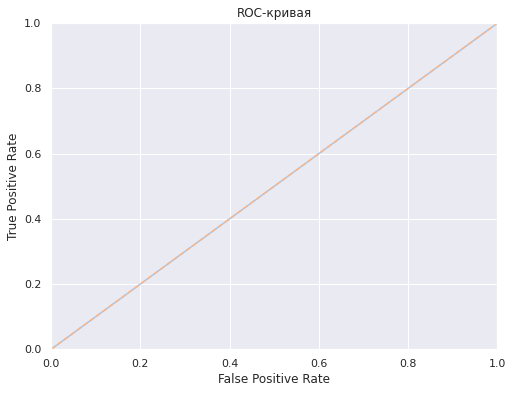

Accuracy: 0.611
F1: 0.0
ROC_auc: 0.5
Precision: 0.0
Recall: 0.0


In [87]:
dummy_pred = results(dummy_model, features_test, target_test) #–°—Ç—Ä–æ–∏–º ROC-AUC –¥–ª—è Dummy Classifier

# Logistic Regression

In [54]:
model_lr = LogisticRegression(random_state=1, solver='liblinear', n_jobs=-1, class_weight='balanced')
model_lr.fit(features_train, target_train)
print('–ö—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü Recall:', cross_val_score(model_lr, features_train, target_train, cv=5, scoring='recall').mean())

–ö—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü Recall: 0.7384622919340194


In [55]:
#print(f'–õ—É—á—à–∏–π Recall –Ω–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ: {model_lr.score(features_train, target_train)}')
print(f'–õ—É—á—à–∏–π Recall –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: {model_lr.score(features_test, target_test)}')

–õ—É—á—à–∏–π Recall –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 0.7258139176053078


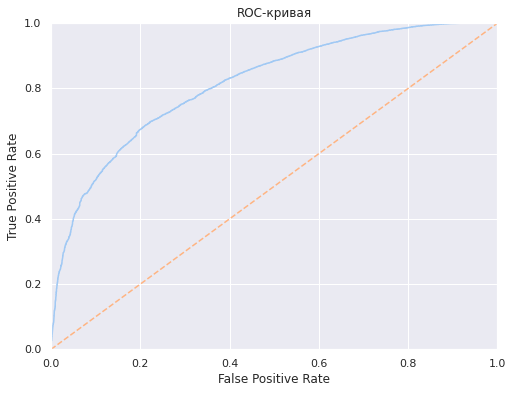

Accuracy: 0.726
F1: 0.679
ROC_auc: 0.73
Precision: 0.623
Recall: 0.747


In [56]:
prediction_lr = results(model_lr, features_test, target_test)

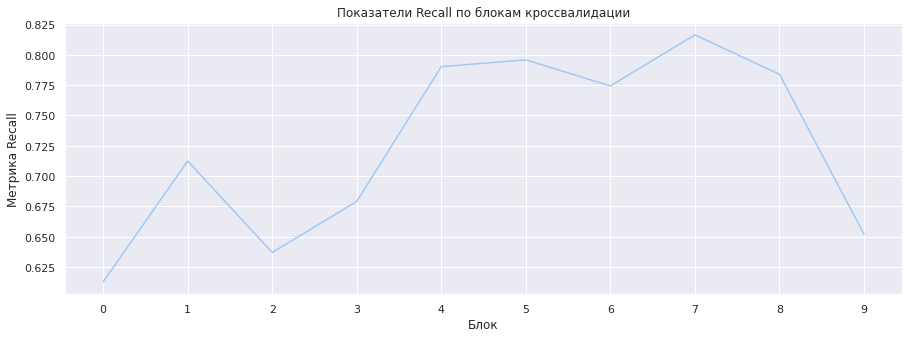

In [57]:
cross_val_plot(model_lr, features_test, target_test)

In [58]:
model_lr.class_weight

'balanced'

# Decision Tree

In [59]:
def objective(trial):
    criterion = trial.suggest_categorical('criterion', ['entropy'])
    max_depth = trial.suggest_int('max_depth', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 30, 60, 10)
    model_dt = DecisionTreeClassifier(random_state=1, criterion=criterion, 
                                     max_depth=max_depth, 
                                     min_samples_leaf=min_samples_leaf,
                                     class_weight='balanced'
                                     )
    model_dt.fit(features_train, target_train)
    trial.set_user_attr(key="best_booster", value=model_dt)
    cross_valid = cross_val_score(model_dt, features_train, target_train, cv=5, scoring='recall', n_jobs=-1).mean()
    return cross_valid

def callback(study, trial):
    if study.best_trial.number == trial.number:
        study.set_user_attr(key="best_booster", value=trial.user_attrs["best_booster"])
    
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100, callbacks=[callback])
model_dt = study.user_attrs["best_booster"]
print('Recall:', study.best_value, '—Å –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏:', study.best_params)

[I 2023-09-30 14:15:45,947] A new study created in memory with name: no-name-5fbda4c0-45f1-4069-b0c6-f11938864bce
[I 2023-09-30 14:15:47,366] Trial 0 finished with value: 0.6064530639008977 and parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 60}. Best is trial 0 with value: 0.6064530639008977.
[I 2023-09-30 14:15:49,288] Trial 1 finished with value: 0.7959052552460201 and parameters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 30}. Best is trial 1 with value: 0.7959052552460201.
[I 2023-09-30 14:15:50,818] Trial 2 finished with value: 0.7025644382961289 and parameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 40}. Best is trial 1 with value: 0.7959052552460201.
[I 2023-09-30 14:15:52,732] Trial 3 finished with value: 0.7934505483966137 and parameters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 60}. Best is trial 1 with value: 0.7959052552460201.
[I 2023-09-30 14:15:54,600] Trial 4 finished with value: 0.795

Recall: 0.817969407381384 —Å –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 30}


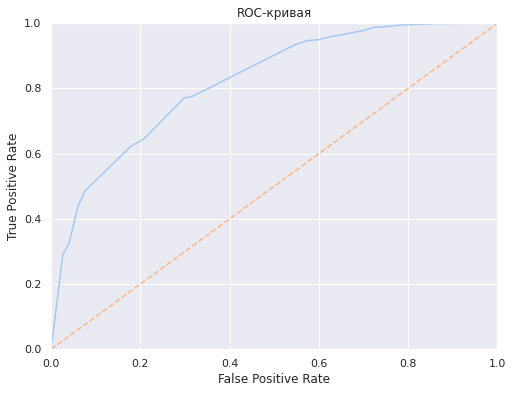

Accuracy: 0.729
F1: 0.688
ROC_auc: 0.736
Precision: 0.621
Recall: 0.772


In [60]:
prediction_dt = results(model_dt, features_test, target_test)

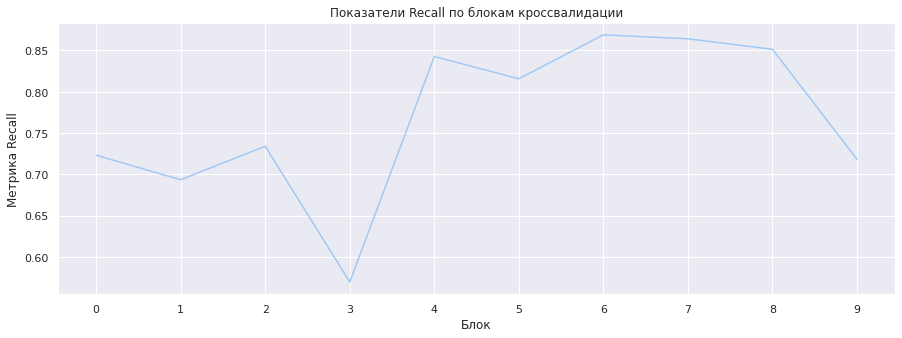

In [61]:
cross_val_plot(model_dt, features_test, target_test)

# Random Forest

In [62]:
def objective(trial):
    criterion = trial.suggest_categorical('criterion', ['entropy'])
    n_estimators = trial.suggest_int('n_estimators', 3, 9, 3)
    max_depth = trial.suggest_int('max_depth', 25, 30)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 10, 50, 10)
    rf_model = RandomForestClassifier(random_state=1, criterion=criterion, 
                                     max_depth=max_depth, 
                                     n_estimators=n_estimators, 
                                     min_samples_leaf=min_samples_leaf,
                                     class_weight='balanced'
                                     )
    rf_model.fit(features_train, target_train)
    trial.set_user_attr(key="best_booster", value=rf_model)
    cross_valid = cross_val_score(rf_model, features_train, target_train, cv=5, scoring='recall', n_jobs=-1).mean()
    return cross_valid

def callback(study, trial):
    if study.best_trial.number == trial.number:
        study.set_user_attr(key="best_booster", value=trial.user_attrs["best_booster"])
    
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50, callbacks=[callback])
model_rf = study.user_attrs["best_booster"]
print('Recall:', study.best_value, '—Å –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏:', study.best_params)

[I 2023-09-30 14:18:38,684] A new study created in memory with name: no-name-11b7b458-9b66-4a7a-8da3-d21e2c04bbc8
[I 2023-09-30 14:18:40,374] Trial 0 finished with value: 0.7585620697815274 and parameters: {'criterion': 'entropy', 'n_estimators': 3, 'max_depth': 30, 'min_samples_leaf': 50}. Best is trial 0 with value: 0.7585620697815274.
[I 2023-09-30 14:18:43,348] Trial 1 finished with value: 0.7882226278627805 and parameters: {'criterion': 'entropy', 'n_estimators': 9, 'max_depth': 30, 'min_samples_leaf': 20}. Best is trial 1 with value: 0.7882226278627805.
[I 2023-09-30 14:18:46,205] Trial 2 finished with value: 0.7689305051545425 and parameters: {'criterion': 'entropy', 'n_estimators': 9, 'max_depth': 27, 'min_samples_leaf': 50}. Best is trial 1 with value: 0.7882226278627805.
[I 2023-09-30 14:18:48,666] Trial 3 finished with value: 0.8028360085108069 and parameters: {'criterion': 'entropy', 'n_estimators': 6, 'max_depth': 29, 'min_samples_leaf': 10}. Best is trial 3 with value: 0.

Recall: 0.8031538564984555 —Å –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏: {'criterion': 'entropy', 'n_estimators': 9, 'max_depth': 30, 'min_samples_leaf': 10}


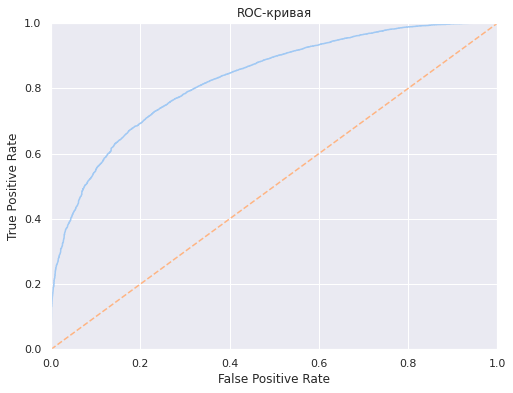

Accuracy: 0.767
F1: 0.682
ROC_auc: 0.744
Precision: 0.727
Recall: 0.641


In [63]:
prediction_rf = results(model_rf, features_test, target_test)

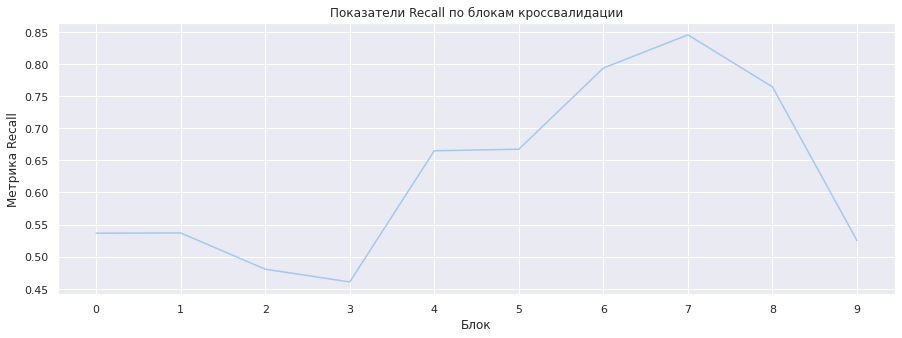

In [64]:
cross_val_plot(model_rf, features_test, target_test)

–í—Å–µ –º–µ—Ç—Ä–∏–∫–∏ —É–º–µ—Å—Ç–∏–º –≤ –æ–¥–Ω–æ–π –∫–æ–º–ø–∞–∫—Ç–Ω–æ–π —Ç–∞–±–ª–∏—Ü–µ. –ò–∑ –Ω–∏—Ö –≤—ã–±–µ—Ä–µ–º –ª—É—á—à—É—é –Ω–∞ –æ—Å–Ω–æ–≤–∞–Ω–∏–∏ –º–µ—Ç—Ä–∏–∫–∏ recall, –∏ –æ–±—Ä–∞—Ç–∏–º –≤–Ω–∏–º–∞–Ω–∏–µ –Ω–∞ f1

In [65]:
best_metrics = pd.DataFrame(data=[('Logistic Regression', round(accuracy_score(target_test, prediction_lr), 3), 
                                  round(f1_score(target_test, prediction_lr), 3), 
                                  round(roc_auc_score(target_test, prediction_lr), 3),
                                  round(precision_score(target_test, prediction_lr), 3), 
                                  round(recall_score(target_test, prediction_lr), 3)),
                                 ('Decision Tree', round(accuracy_score(target_test, prediction_dt), 3), 
                                  round(f1_score(target_test, prediction_dt), 3), 
                                  round(roc_auc_score(target_test, prediction_dt), 3),
                                  round(precision_score(target_test, prediction_dt), 3), 
                                  round(recall_score(target_test, prediction_dt), 3)), 
                                 ('Random Forest', round(accuracy_score(target_test, prediction_rf), 3), 
                                  round(f1_score(target_test, prediction_rf), 3), 
                                  round(roc_auc_score(target_test, prediction_rf), 3),
                                  round(precision_score(target_test, prediction_rf), 3), 
                                  round(recall_score(target_test, prediction_rf), 3))],
                                 columns=['model', 'accuracy', 'f1', 'roc_auc', 'precision', 'recall'])
best_metrics

model  accuracy     f1  roc_auc  precision  recall
0  Logistic Regression     0.726  0.679    0.730      0.623   0.747
1        Decision Tree     0.729  0.688    0.736      0.621   0.772
2        Random Forest     0.767  0.682    0.744      0.727   0.641

–ö–∞–∫ –º—ã –≤–∏–¥–∏–º, –≤—Å–µ —Ç—Ä–∏ –º–æ–¥–µ–ª–∏ –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω—ã –∏ –∞–¥–µ–∫–≤–∞—Ç–Ω—ã.

–ú—ã –ø–æ—Å—Ç—Ä–∏–ª–∏ —Ç—Ä–∏ –º–æ–¥–µ–ª–∏, –∏, –∫–∞–∫ –≤–∏–¥–∏–º, –≤—Å–µ —Ç—Ä–∏ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ —Ä–∞–±–æ—Ç–æ—Å–ø–æ—Å–æ–±–Ω—ã. –ö—Ä–æ—Å—Å–≤–∞–ª–∏–¥–∞—Ü–∏—é –¥–µ–ª–∞–ª–∏ –ø–æ –º–µ—Ç—Ä–∏–∫–µ ROC AUC.

- –ü–µ—Ä–≤–∞—è - –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è. –ü–æ–∫–∞–∑–∞—Ç–µ–ª—å –∫—Ä–æ—Å—Å–≤–∞–ª–∏–¥–∞—Ü–∏–∏ 0.8339893308930117. –ú–µ—Ç—Ä–∏–∫–∏ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: Accuracy: 0.726, F1: 0.679, ROC_auc: 0.73, Precision: 0.623, Recall: 0.747.
- –î–∞–ª–µ–µ —Å–¥–µ–ª–∞–ª–∏ –¥–µ—Ä–µ–≤–æ —Ä–µ—à–µ–Ω–∏–π —Å –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–º –∫—Ä–æ—Å—Å–≤–∞–ª–∏–¥–∞—Ü–∏–∏ Recall: 0.8034712124355357 —Å –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏: {'criterion': 'entropy', 'n_estimators': 6, 'max_depth': 25, 'min_samples_leaf': 10}. –ú–µ—Ç—Ä–∏–∫–∏ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: Accuracy: 0.729, F1: 0.688, ROC_auc: 0.736, Precision: 0.621, Recall: 0.772.
- –ó–∞–º—ã–∫–∞–µ—Ç —Å–ª—É—á–∞–π–Ω—ã–π –ª–µ—Å. –ü–æ–∫–∞–∑–∞—Ç–µ–ª—å –∫—Ä–æ—Å—Å–≤–∞–ª–∏–¥–∞—Ü–∏–∏ Recall: 0.7735804330670493 —Å –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏: {'criterion': 'entropy', 'n_estimators': 9, 'max_depth': 25, 'min_samples_leaf': 50}. –ú–µ—Ç—Ä–∏–∫–∏ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: Accuracy: 0.763, F1: 0.681, ROC_auc: 0.743, Precision: 0.712, Recall: 0.653.
- –í—Å–µ –º–æ–¥–µ–ª–∏ –∞–¥–µ–∫–≤–∞—Ç–Ω—ã –≤ —Å—Ä–∞–≤–Ω–µ–Ω–∏–∏ —Å DummyClassifier.
- –£ Random Forest —Å–ª–∏—à–∫–æ–º –≤–æ–ª–∞—Ç–∏–ª—å–Ω—ã–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ recall –≤ –±–ª–æ–∫–∞—Ö –∫—Ä–æ—Å—Å–≤–∞–ª–∏–¥–∞—Ü–∏–∏ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ. –ù–µ –≥–æ–≤–æ—Ä—è –æ —Ç–æ–º, —á—Ç–æ recall —Å–∞–º—ã–π –Ω–∏–∑–∫–∏–π, —Ö–æ—Ç—è –º–æ–¥–µ–ª—å –ª—É—á—à–µ –≤ —Ü–µ–ª–æ–º.

–ö–∞–∫ –≤–∏–¥–∏–º –ø–æ –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è–º –∫—Ä–æ—Å—Å–≤–∞–ª–∏–¥–∞—Ü–∏–∏ –Ω–∞ –æ—Å–Ω–æ–≤–µ –º–µ—Ç—Ä–∏–∫–∏ recall, –Ω–∞—Å —É—Å—Ç—Ä–∞–∏–≤–∞–µ—Ç –º–æ–¥–µ–ª—å Decision Tree —Å –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–º 0,818. –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ —Ç–µ—Å—Ç–≤–æ–π –≤—ã–±–æ—Ä–∫–µ –ø–æ–¥—Å–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞–º, —á—Ç–æ –≤—ã–±–æ—Ä –ø—Ä–∞–≤–∏–ª—å–Ω—ã–π, –º–æ–¥–µ–ª—å –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω–∞ –∏ –∞–¥–µ–∫–≤–∞—Ç–Ω–∞.

–ü–æ–¥—Ç–≤–µ—Ä–∂–¥–µ–Ω–∏–µ –≤—ã–±—Ä–∞–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏ –∏ –ø—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ –±–∏–∑–Ω–µ—Å-–º–µ—Ç—Ä–∏–∫–µ

–û—Å–æ–±–µ–Ω–Ω–æ –¥–ª—è —Å–µ–±—è –æ—Ç–º–µ—Ç–∏–º –º–µ—Ç—Ä–∏–∫—É F1 –∏ recall –≤ —á–∞—Å—Ç–Ω–æ—Å—Ç–∏. –ü—Ä–æ–≤–µ—Ä–∏–º –±–æ–ª–µ–µ –Ω–∞–≥–ª—è–¥–Ω–æ –Ω–∞ —Ö–∏—Ç–º—ç–ø–µ.

In [66]:
def heatmatrix(title, prediction):
    sns.heatmap(confusion_matrix(target_test, prediction), annot=True, cmap='Blues', fmt='g', 
               xticklabels=['–ù–µ –æ—Ç–º–µ–Ω–∞', '–û—Ç–º–µ–Ω–∞'], yticklabels=['–ù–µ –æ—Ç–º–µ–Ω–∞', '–û—Ç–º–µ–Ω–∞'])
    plt.title(f'–ú–∞—Ç—Ä–∏—Ü–∞ –æ—à–∏–±–æ–∫ {title}')
    plt.xlabel('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è')
    plt.ylabel('–ü—Ä–∞–≤–∏–ª—å–Ω—ã–µ –æ—Ç–≤–µ—Ç—ã')
    plt.show()

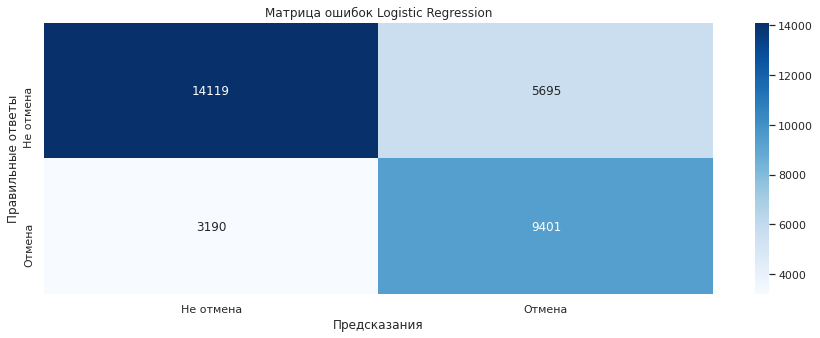

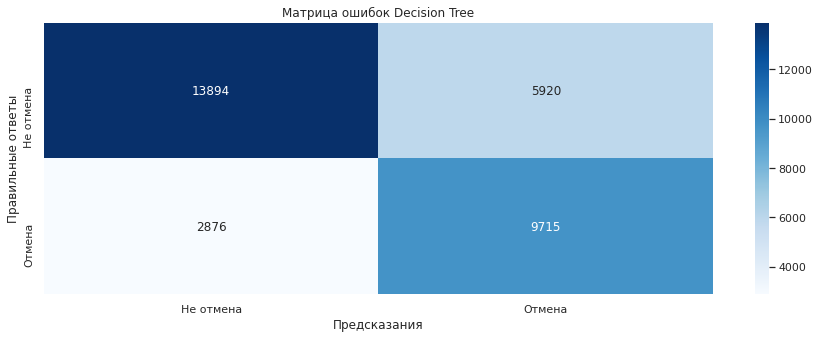

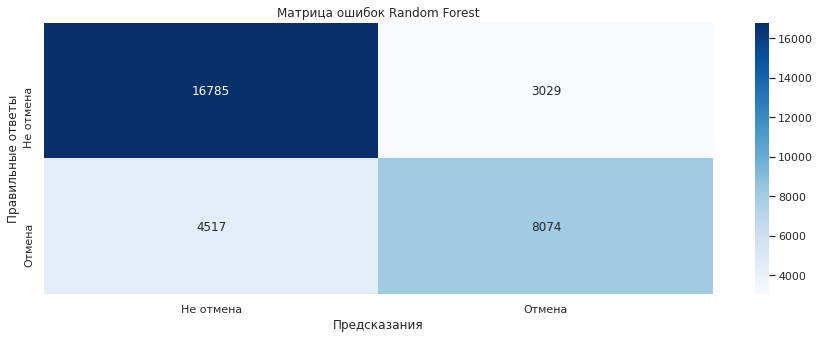

In [67]:
models = [('Logistic Regression', prediction_lr), ('Decision Tree', prediction_dt), ('Random Forest', prediction_rf)]
for title, prediction in models:
    heatmatrix(title, prediction)


–õ–æ–≥ —Ä–µ–≥—Ä–µ—Å–∏—è –∏ –¥–µ—Ä–µ–≤–æ –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞—é—Ç –æ—á–µ–Ω—å —Ö–æ—Ä–æ—à–æ –Ω–∞—à —Ü–µ–ª–µ–≤–æ–π –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å. –ü—Ä–æ–≤–µ—Ä–∏–º, –∫–∞–∫–∞—è –º–æ–¥–µ–ª—å –ø—Ä–∏–Ω–µ—Å–µ—Ç –±–æ–ª—å—à–µ –ø—Ä–∏–±—ã–ª–∏.

In [68]:
predictions = [('prediction_lr', prediction_lr), ('prediction_dt', prediction_dt), ('prediction_rf', prediction_rf)]
for name, prediction in predictions:
    series = pd.Series(prediction).to_frame()
    series.columns = [name]
    df_for_profit = df_for_profit.merge(series, how='left', left_index=True, right_index=True)

In [69]:
def predicted_profit(data, col):
    if data['is_canceled'] == 0:
        income = data['price_per_night'] * data['koeff'] * data['total_nights']
        expenses = data['service_price'] * (1 + data['total_nights'] // 2)
    elif (data['is_canceled'] == 1) and (data[col] == 0):
        income = 0
        expenses = data['service_price'] + (data['price_per_night'] * data['koeff'])
    elif (data['is_canceled'] == 1) and (data[col] == 1):
        income = (data['price_per_night'] * data['koeff'] * .8) + (data['service_price'] * .8)
        expenses = data['service_price'] + (data['price_per_night'] * data['koeff'])
    profit = income - expenses
    return profit

In [70]:
for new_col, col in [('profit_lr', 'prediction_lr'), ('profit_dt', 'prediction_dt'), ('profit_rf', 'prediction_rf')]:
    df_for_profit[new_col] = df_for_profit.apply(predicted_profit, col=col, axis=1)

In [71]:
display(df_for_profit)

is_canceled arrival_date_month reserved_room_type  total_nights  \
0                1            January                  A             1   
1                1            January                  A             4   
2                1            January                  A             4   
3                1            January                  A             4   
4                1            January                  A             7   
...            ...                ...                ...           ...   
32400            0             August                  A             6   
32401            0             August                  A             7   
32402            0             August                  A             7   
32403            0             August                  D             7   
32404            0             August                  A             7   

       price_per_night  service_price  koeff  total_profit  prediction_lr  \
0                 1000            400    1.0       -1400.0              1   
1                 1000            400    1.0       -1400.0              0   
2                 1000            400    1.0       -1400.0              0   
3                 1000            400    1.0       -1400.0              1   
4                 1000            400    1.0       -1400.0              1   
...                ...            ...    ...           ...            ...   
32400             1000            400    1.4        6800.0              1   
32401             1000            400    1.4        8200.0              0   
32402             1000            400    1.4        8200.0              0   
32403              550            150    1.4        4790.0              0   
32404             1000            400    1.4        8200.0              1   

       prediction_dt  prediction_rf  profit_lr  profit_dt  profit_rf  
0                  1              1     -280.0     -280.0     -280.0  
1                  0              0    -1400.0    -1400.0    -1400.0  
2                  0              0    -1400.0    -1400.0    -1400.0  
3                  1              1     -280.0     -280.0     -280.0  
4                  1              0     -280.0     -280.0    -1400.0  
...              ...            ...        ...        ...        ...  
32400              1              0     6800.0     6800.0     6800.0  
32401              0              0     8200.0     8200.0     8200.0  
32402              1              1     8200.0     8200.0     8200.0  
32403              0              0     4790.0     4790.0     4790.0  
32404              1              1     8200.0     8200.0     8200.0  

[32405 rows x 14 columns]

In [72]:
print('–ü—Ä–∏–±—ã–ª—å –ø–æ—Å–ª–µ –æ–±—É—á–µ–Ω–∏—è LR:', df_for_profit['profit_lr'].sum())
print('–ü—Ä–∏–±—ã–ª—å –ø–æ—Å–ª–µ –æ–±—É—á–µ–Ω–∏—è DT:', df_for_profit['profit_dt'].sum())
print('–ü—Ä–∏–±—ã–ª—å –ø–æ—Å–ª–µ –æ–±—É—á–µ–Ω–∏—è RF:', df_for_profit['profit_rf'].sum())

–ü—Ä–∏–±—ã–ª—å –ø–æ—Å–ª–µ –æ–±—É—á–µ–Ω–∏—è LR: 43494206.0
–ü—Ä–∏–±—ã–ª—å –ø–æ—Å–ª–µ –æ–±—É—á–µ–Ω–∏—è DT: 43796390.0
–ü—Ä–∏–±—ã–ª—å –ø–æ—Å–ª–µ –æ–±—É—á–µ–Ω–∏—è RF: 41977902.0


In [73]:
print('–ü—Ä–∏–±—ã–ª—å –æ—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è LR:', (df_for_profit['profit_lr'].sum() - df_for_profit['total_profit'].sum()))
print('–ü—Ä–∏–±—ã–ª—å –æ—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è DT:', (df_for_profit['profit_dt'].sum() - df_for_profit['total_profit'].sum()))
print('–ü—Ä–∏–±—ã–ª—å –æ—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è RF:', (df_for_profit['profit_rf'].sum() - df_for_profit['total_profit'].sum()))

–ü—Ä–∏–±—ã–ª—å –æ—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è LR: 10933136.0
–ü—Ä–∏–±—ã–ª—å –æ—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è DT: 11235320.0
–ü—Ä–∏–±—ã–ª—å –æ—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è RF: 9416832.0


–í—ã–¥–≤–∏–Ω–µ–º –≥–∏–ø–æ—Ç–µ–∑—É –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –º–æ–¥–µ–ª–∏ Decision Tree:

- –ù0: –°—Ä–µ–¥–Ω—è—è –ø—Ä–∏–±—ã–ª—å –Ω–µ –∏–∑–º–µ–Ω–∏–ª–∞—Å—å
- –ù1: –°—Ä–µ–¥–Ω—è—è –ø—Ä–∏–±—ã–ª—å —É–≤–µ–ª–∏—á–∏–ª–∞—Å—å

In [74]:
hypothesis(df_for_profit['total_profit'], df_for_profit['profit_dt'])

p-–∑–Ω–∞—á–µ–Ω–∏–µ: 9.144778240650904e-87
–û—Ç–≤–µ—Ä–≥–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É


–ü—Ä–∏–±—ã–ª—å, —Å–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ, —É–≤–µ–ª–∏—á–∏—Ç—Å—è, –µ—Å–ª–∏ –≤–µ—Ä–∏—Ç—å —Ç–µ—Å—Ç—É p-value.

–ö–∞–∫ –≤–∏–¥–∏–º, –Ω–∞—Å –±–æ–ª—å—à–µ –≤—Å–µ–≥–æ —É—Å—Ç—Ä–∞–∏–≤–∞–µ—Ç –º–æ–¥–µ–ª—å Decision Tree. –û–Ω–∞ –º–æ–≥–ª–∞ –±—ã –ø—Ä–∏–Ω–µ—Å—Ç–∏ –±–æ–ª–µ–µ 11 –º–ª–Ω —Ä—É–± –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ–π –ø—Ä–∏–±—ã–ª–∏ –∑–∞ –æ—Ç—á–µ—Ç–Ω—ã–π –ø–µ—Ä–∏–æ–¥, —á—Ç–æ –ø–µ—Ä–µ–∫—Ä—ã–≤–∞–µ—Ç —Å –ª–∏—Ö–≤–æ–π –∑–∞—Ç—Ä–∞—Ç—ã –≤ 400_000 —Ä—É–± –Ω–∞ –µ–µ —Ä–∞–∑—Ä–∞–±–æ—Ç–∫—É. –£ –Ω–µ–µ —Ö–æ—Ä–æ—à–∏–π F1, –æ—Ç–ª–∏—á–Ω—ã–π recall –∏ precision –Ω–∞ –¥–æ—Å—Ç–æ–π–Ω–æ–º —É—Ä–æ–≤–Ω–µ, —Ö–æ—Ç—è –∏ –Ω–µ —è–≤–ª—è–µ—Ç—Å—è —Ü–µ–ª–µ–≤–æ–π –º–µ—Ç—Ä–∏–∫–æ–π. –°–æ—Ö—Ä–∞–Ω–∏–º —ç—Ç—É –º–æ–¥–µ–ª—å –∏ –±—É–¥–µ–º –ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è –µ–π –≤ –¥–∞–ª—å–Ω–µ–π—à–µ–º.

### –®–∞–≥ 5. –û–ø–∏—à–∏—Ç–µ –ø–æ—Ä—Ç—Ä–µ—Ç ¬´–Ω–µ–Ω–∞–¥—ë–∂–Ω–æ–≥–æ¬ª –∫–ª–∏–µ–Ω—Ç–∞

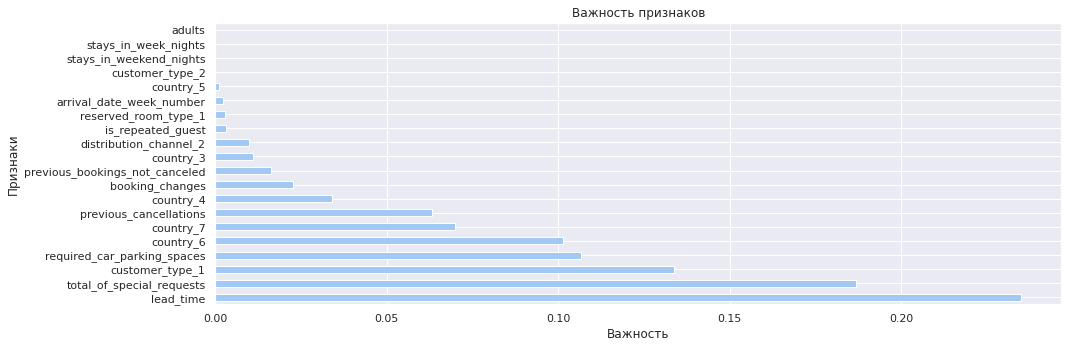

In [75]:
#–ü–æ—Å–º–æ—Ç—Ä–∏–º, –∫–∞–∫–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –≤—ã–¥–µ–ª–∏–ª–∞ –Ω–∞—à–∞ –º–æ–¥–µ–ª—å
pd.Series(model_dt.feature_importances_, features_train.columns).nlargest(20).plot(kind='barh')
plt.title('–í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤')
plt.xlabel('–í–∞–∂–Ω–æ—Å—Ç—å')
plt.ylabel('–ü—Ä–∏–∑–Ω–∞–∫–∏')
plt.tight_layout()
plt.show()

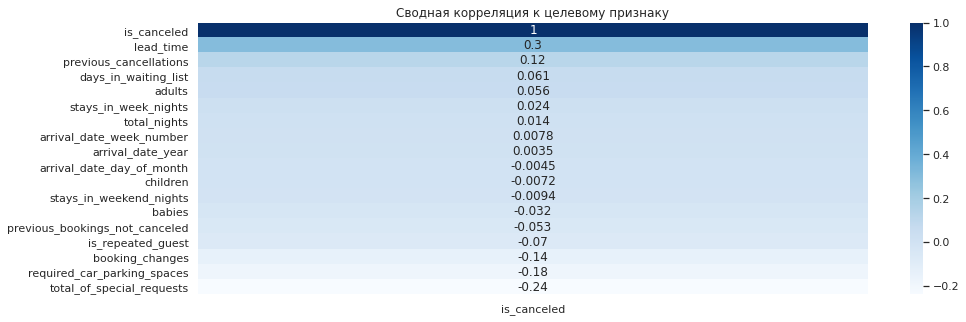

In [76]:
#–ü—Ä–æ–≤–µ—Ä–∏–º –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é –º–µ–∂–¥—É –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏ –∫ —Ü–µ–ª–µ–≤–æ–º—É –ø—Ä–∏–∑–Ω–∞–∫—É –Ω–∞ –æ–±–æ–±—â–µ–Ω–Ω–æ–º –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–µ
hotel_concat = pd.concat([hotel_train, hotel_test])
sns.heatmap(hotel_concat.corr()[['is_canceled']].sort_values('is_canceled', ascending=False),
                annot = True, annot_kws = {"size":12}, cmap='Blues')
plt.title('–°–≤–æ–¥–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –∫ —Ü–µ–ª–µ–≤–æ–º—É –ø—Ä–∏–∑–Ω–∞–∫—É')
plt.show()

–ò–∑ —Ç–µ—Ö –∑–Ω–∞—á–µ–Ω–∏–π, —á—Ç–æ –Ω–µ –ø–æ–¥–≤–µ—Ä–≥–ª–∏—Å—å –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—é, –º—ã –º–æ–∂–µ–º –æ—Ç–º–µ—Ç–∏—Ç—å —Å–ª–µ–¥—É—é—â–∏–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏, –Ω–∞ –∫–æ—Ç–æ—Ä—ã–µ –æ–±—Ä–∞—Ç–∏–ª–∞ –≤–Ω–∏–º–∞–Ω–∏–µ –º–æ–¥–µ–ª—å:

- –ß–µ–º –±–æ–ª—å—à–µ –≤—Ä–µ–º–µ–Ω–∏ –º–µ–∂–¥—É –±—Ä–æ–Ω–∏—Ä–æ–≤–∞–Ω–∏–µ–º –∏ –≤—ã–µ–∑–¥–æ–º, —Ç–µ–º –≤—ã—à–µ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –æ—Ç–∫–∞–∑–∞. –ï—Å—Ç—å –≤—Ä–µ–º—è –ø–µ—Ä–µ–¥—É–º–∞—Ç—å.
- –ß–µ–º –±–æ–ª—å—à–µ —Å–ø–µ—Ü–∏–∞–ª—å–Ω—ã—Ö –æ—Ç–º–µ—Ç–æ–∫, —Ç–µ–º –Ω–∏–∂–µ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –æ—Ç–∫–∞–∑–∞. –ì–æ—Å—Ç–∏, –∫–æ—Ç–æ—Ä—ã–µ –æ—Å—Ç–∞–≤–ª—è—é—Ç –æ—Ç–º–µ—Ç–∫–∏ –∏–ª–∏ –ø–æ–∂–µ–ª–∞–Ω–∏—è, –∑–∞–∏–Ω—Ç–µ—Ä–µ—Å–æ–≤–∞–Ω—ã –≤ —Ç–æ–º, —á—Ç–æ–±—ã —Å–Ω—è—Ç—å –Ω–æ–º–µ—Ä.
- –ï—Å–ª–∏ –µ—Å—Ç—å —Ç—Ä–µ–±–æ–≤–∞–Ω–∏—è –∫ –ø–∞—Ä–∫–æ–≤–æ—á–Ω—ã–º –º–µ—Å—Ç–∞–º, —Ç–æ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –æ—Ç–∫–∞–∑–∞ –æ—Ç –±—Ä–æ–Ω–∏—Ä–æ–≤–∞–Ω–∏—è –Ω–∏–∂–µ. –ï—Å–ª–∏ —á–µ–ª–æ–≤–µ–∫ –µ–¥–µ—Ç –Ω–∞ –º–∞—à–∏–Ω–µ, –∑–Ω–∞—á–∏—Ç –ø—É—Ç–µ—à–µ—Å—Ç–≤–∏–µ, —Å–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ, –∑–∞–ø–ª–∞–Ω–∏—Ä–æ–≤–∞–Ω–æ –∏ –º–µ–Ω—å—à–µ —Å–æ–±–ª–∞–∑–Ω–∞ –æ—Ç–º–µ–Ω—è—Ç—å –±—Ä–æ–Ω—å.
- –ï—Å–ª–∏ –µ—Å—Ç—å –æ—Ç–º–µ–Ω—ã –±—Ä–æ–Ω–∏, —Ç–æ –µ—Å—Ç—å –∏ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –æ—Ç–∫–∞–∑–∞. –£ –∫–ª–∏–µ–Ω—Ç–∞ –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è –º–æ–¥—É—Å –ø–æ–≤–µ–¥–µ–Ω–∏—è.
- –ß–µ–º –±–æ–ª—å—à–µ –±—ã–ª–æ –Ω–µ–æ—Ç–º–µ–Ω–µ–Ω–Ω—ã—Ö –±—Ä–æ–Ω–µ–π —É –∫–ª–∏–µ–Ω—Ç–∞ —Ä–∞–Ω–µ–µ, —Ç–µ–º –Ω–∏–∂–µ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –æ—Ç–º–µ–Ω—ã.
- –ß–µ–º –≤—ã—à–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–∑–º–µ–Ω–µ–Ω–∏–π –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –∑–∞–∫–∞–∑–∞, —Ç–µ–º –Ω–∏–∂–µ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –æ—Ç–º–µ–Ω—ã –±—Ä–æ–Ω–∏. –û–ø—è—Ç—å –∂–µ, –µ—Å–ª–∏ —á–µ–ª–æ–≤–µ–∫ –æ—Å—Ç–∞–≤–ª—è–µ—Ç –∫–∞–∫–∏–µ —Ç–æ —Ç—Ä–µ–±–æ–≤–∞–Ω–∏—è, —Ç–æ –∑–Ω–∞—á–∏—Ç –æ–Ω, —Å–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ, –∑–∞–∏–Ω—Ç–µ—Ä–µ—Å–æ–≤–∞–Ω –≤ –±—Ä–æ–Ω–∏.
- –ï—Å–ª–∏ –≥–æ—Å—Ç—å –¥–æ —ç—Ç–æ–≥–æ –±—Ä–æ–Ω–∏—Ä–æ–≤–∞–ª –Ω–æ–º–µ—Ä, —Ç–æ –Ω–∏–∂–µ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –æ—Ç–º–µ–Ω—ã –≤ –¥–∞–ª—å–Ω–µ–π—à–µ–º. –∑–Ω–∞—á–∏—Ç –∫–ª–∏–µ–Ω—Ç –ø—Ä–æ–≤–µ—Ä–µ–Ω–Ω—ã–π.
- –í—Ä–µ–º—è –≥–æ–¥–∞ —Ç–∞–∫–∂–µ –∏–º–µ–µ—Ç –∑–Ω–∞—á–µ–Ω–∏–µ.

–î–∞–ª–µ–µ —Ä–∞—Å—Å–º–æ—Ç—Ä–∏–º –ø–æ–±–ª–∏–∂–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –∏ –∏—Ö –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏.

In [77]:
#–î–æ–±–∞–≤–∏–º –∫ —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞–µ–º–æ–º—É –¥–∞—Ç–∞—Å–µ—Ç—É —Å—Ç–æ–ª–±–µ—Ü —Å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è–º–∏, —á—Ç–æ–±—ã –¥–µ–ª–∞—Ç—å —Å—Ä–∞–≤–Ω–∏—Ç–µ–ª—å–Ω—ã–µ —Ç–∞–±–ª–∏—Ü—ã
prediction_dt = pd.Series(prediction_dt).to_frame()
prediction_dt.columns = ['prediction_dt']
hotel_test = hotel_test.merge(prediction_dt, left_index=True, right_index=True)
hotel_test

is_canceled  lead_time  arrival_date_year arrival_date_month  \
0                1       74.0               2017            January   
1                1       62.0               2017            January   
2                1       62.0               2017            January   
3                1       71.0               2017            January   
4                1      172.0               2017            January   
...            ...        ...                ...                ...   
32400            0      164.0               2017             August   
32401            0       21.0               2017             August   
32402            0       23.0               2017             August   
32403            0       34.0               2017             August   
32404            0      109.0               2017             August   

       arrival_date_week_number  arrival_date_day_of_month  \
0                             1                          1   
1                             1                          1   
2                             1                          1   
3                             1                          1   
4                             1                          1   
...                         ...                        ...   
32400                        35                         31   
32401                        35                         30   
32402                        35                         30   
32403                        35                         31   
32404                        35                         31   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  \
0                            1                     0     2.0       0.0   
1                            2                     2     2.0       0.0   
2                            2                     2     2.0       0.0   
3                            2                     2     1.0       0.0   
4                            2                     5     2.0       0.0   
...                        ...                   ...     ...       ...   
32400                        2                     4     2.0       0.0   
32401                        2                     5     2.0       0.0   
32402                        2                     5     2.0       0.0   
32403                        2                     5     2.0       0.0   
32404                        2                     5     2.0       0.0   

       babies meal country distribution_channel  is_repeated_guest  \
0         0.0   BB     PRT                TA/TO                  0   
1         0.0   BB     AUT                TA/TO                  0   
2         0.0   BB     AUT                TA/TO                  0   
3         0.0   BB     PRT                TA/TO                  0   
4         0.0   BB     BEL                TA/TO                  0   
...       ...  ...     ...                  ...                ...   
32400     0.0   BB     DEU                TA/TO                  0   
32401     0.0   BB     BEL                TA/TO                  0   
32402     0.0   BB     BEL                TA/TO                  0   
32403     0.0   BB     DEU                TA/TO                  0   
32404     0.0   BB     GBR                TA/TO                  0   

       previous_cancellations  previous_bookings_not_canceled  \
0                           0                               0   
1                           0                               0   
2                           0                               0   
3                           0                               0   
4                           0                               0   
...                       ...                             ...   
32400                       0                               0   
32401                       0                               0   
32402                       0                               0   
32403                       0

In [78]:
#–°–æ–∑–¥–∞–¥–∏–º —Ñ—É–Ω–∫—Ü–∏—é –¥–ª—è —Å—Ä–∞–≤–Ω–µ–Ω–∏—è –∫–∞—Ç –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–æ–º—É –∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–æ–º—É —Ü–µ–ª–µ–≤–æ–º—É –ø—Ä–∏–∑–Ω–∞–∫—É
def cat_comparison(column):
    fig, ax = plt.subplots(1, 2, sharex=True, sharey=True)
    fig.suptitle(f'–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç–º–µ–Ω—ã –±—Ä–æ–Ω–∏—Ä–æ–≤–∞–Ω–∏—è –æ—Ç –∫–∞—Ç–µ–≥–æ—Ä–∏–π {column}', fontweight="bold")
    sns.barplot(data=hotel_test, x=column, y='is_canceled', ax=ax[0])
    ax[0].set_title('–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –æ—Ç–º–µ–Ω—ã')
    ax[0].set_xlabel('–ö–∞—Ç–µ–≥–æ—Ä–∏–∏')
    ax[0].set_ylabel('–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Ü–µ–ª–µ–≤–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞')
    sns.barplot(data=hotel_test, x=column, y='prediction_dt', ax=ax[1])
    ax[1].set_title('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –æ—Ç–º–µ–Ω—ã')
    ax[1].set_xlabel('–ö–∞—Ç–µ–≥–æ—Ä–∏–∏')
    ax[1].set_ylabel('–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Ü–µ–ª–µ–≤–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞')
    plt.show()
    val_counts = hotel_train.value_counts(column).to_frame()
    val_counts.columns = ['share']
    val_counts['share'] = (val_counts['share'] / val_counts['share'].sum()).apply(lambda x: '{0:.2%}'.format(x))
    display(val_counts)

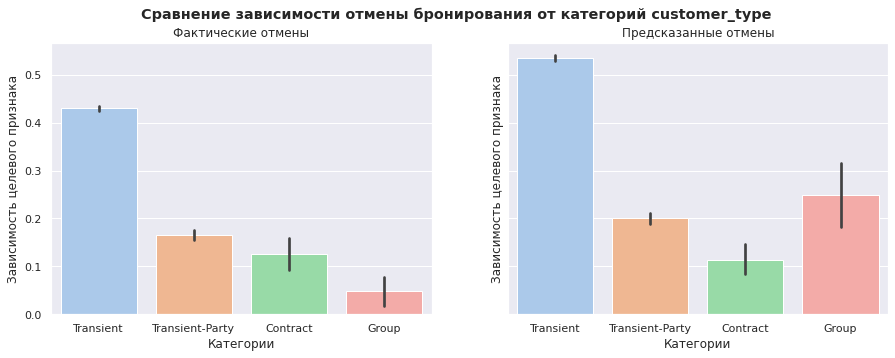

share
customer_type          
Transient        69.74%
Transient-Party  25.61%
Contract          4.21%
Group             0.44%

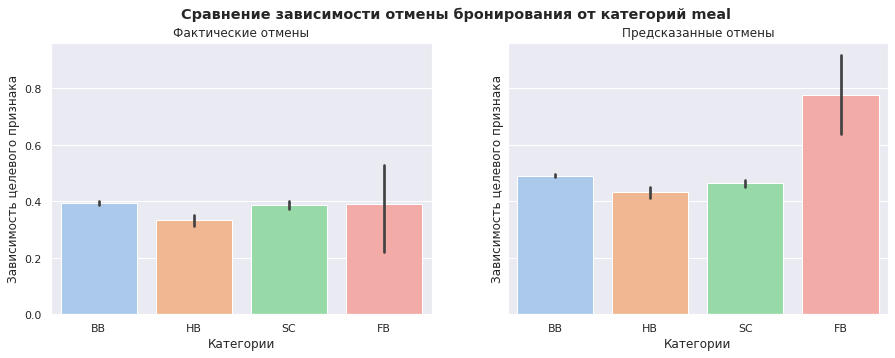

share
meal        
BB    79.27%
HB    11.18%
SC     8.86%
FB     0.69%

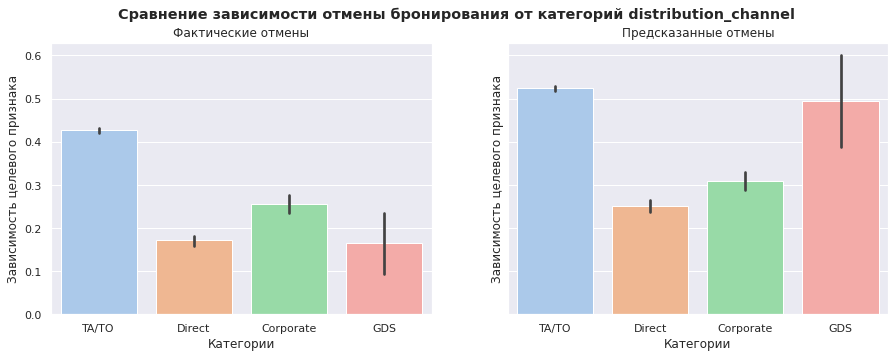

share
distribution_channel        
TA/TO                 83.48%
Direct                10.50%
Corporate              5.86%
GDS                    0.15%

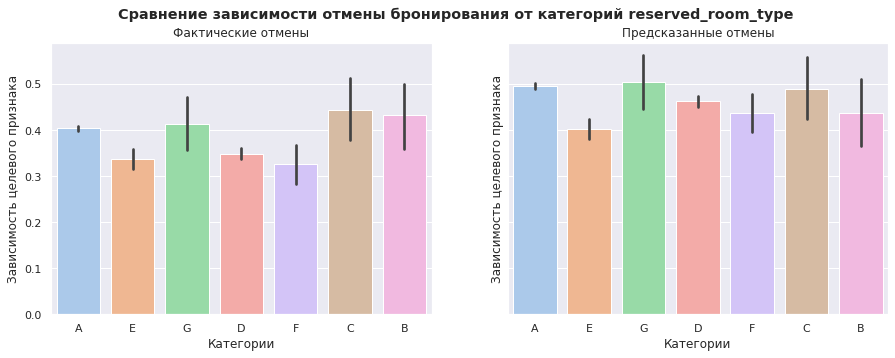

share
reserved_room_type        
A                   77.42%
D                   14.39%
E                    3.75%
F                    1.86%
B                    1.32%
G                    0.91%
C                    0.35%

In [79]:
cols = ['customer_type', 'meal', 'distribution_channel', 'reserved_room_type']
for col in cols:
    cat_comparison(col)

–í—ã–≤–æ–¥—ã –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–º —Å—Ç–æ–ª–±—Ü–∞–º:

- –ü–æ —Ç–∏–ø—É –∑–∞–∫–∞–∑—á–∏–∫–∞ –±–æ–ª—å—à–µ –≤—Å–µ—Ö –æ—Ç–º–µ–Ω—è–µ—Ç –∫–∞—Ç–µ–≥–æ—Ä–∏—è Transient, –Ω–æ –º–æ–¥–µ–ª—å —Å–º–µ—Å—Ç–∏–ª–∞ –≤—ã–±–æ—Ä –≤ –ø–æ–ª—å–∑—É —Å–∞–º–æ–π –Ω–∏–∑–∫–æ–π - Group, —á—Ç–æ –Ω–µ —Ç–∞–∫ –≤–∞–∂–Ω–æ, —É—á–∏—Ç—ã–≤–∞—è –æ–±—â—É—é –¥–æ–ª—é —ç—Ç–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –º–µ–Ω–µ–µ 1%.
- –ü–æ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º meal —É –Ω–∞—Å –Ω–µ—Ç –æ—Å–æ–±—ã—Ö —Å–∫–∞—á–∫–æ–≤, –≤—Å–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –≥–¥–µ-—Ç–æ –Ω–∞ —É—Ä–æ–≤–Ω–µ 0,4. –ú–æ–¥–µ–ª—å –æ—Ç–¥–∞–ª–∞ –ø—Ä–µ–¥–ø–æ—á—Ç–µ–Ω–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ FB, —á—Ç–æ —Ç–∞–∫–∂–µ –Ω–µ–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ, —Ç–∫ –æ–Ω–∞ –∑–∞–Ω–∏–º–∞–µ—Ç –º–µ–Ω–µ–µ 1% –∏ –≤—Ä—è–¥ –ª–∏ —Å–ø–æ—Å–æ–±–Ω–∞ –Ω–∞–≤—Ä–µ–¥–∏—Ç—å –º–µ—Ç—Ä–∏–∫–∞–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π.
- –ü–æ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º distribution_channel –≤—ã–¥–µ–ª—è—é—Ç—Å—è TA/TO –∏ Corporate. –ß—Ç–æ –∫–∞—Å–∞–µ—Ç—Å—è –º–æ–¥–µ–ª–∏, —Ç–æ –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è —Ç–∞ –∂–µ –∫–∞—Ä—Ç–∏–Ω–∞, —á—Ç–æ –∏ –≤ –ø—Ä–µ–¥—ã–¥—É—â–∏—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏—è—Ö - –∑–∞–º–µ—Ç–µ–Ω —Å–∫–∞—á–æ–∫ –Ω–∞ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ GDS, –∫–æ—Ç–æ—Ä–∞—è –∑–∞–Ω–∏–º–∞–µ—Ç –º–µ–Ω–µ–µ 1%.
- –ü–æ reserved_room_type –º—ã —É–∂–µ –æ—Ç–º–µ—á–∞–ª–∏, —á—Ç–æ –æ—Ç–º–µ–Ω—è—é—Ç –≤ –æ—Å–Ω–æ–≤–Ω–æ–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –ê, –í, –°, G. –ú–æ–¥–µ–ª—å –≤ –æ–±—â–∏—Ö —á–µ—Ä—Ç–∞—Ö –≤–æ—Å–ø—Ä–æ–∏–∑–≤–µ–ª–∞ —ç—Ç–∏ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏.

–ö–∞–∫ —É –Ω–∞—Å –æ–±—Å—Ç–æ—è—Ç –¥–µ–ª–∞ —Å –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º–∏ country?

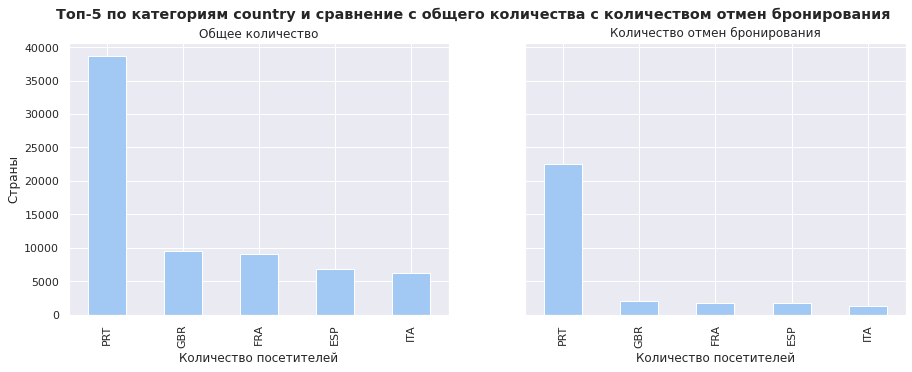

In [80]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True)
fig.suptitle('–¢–æ–ø-5 –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º country –∏ —Å—Ä–∞–≤–Ω–µ–Ω–∏–µ —Å –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –æ—Ç–º–µ–Ω –±—Ä–æ–Ω–∏—Ä–æ–≤–∞–Ω–∏—è', fontweight="bold")
hotel_concat.value_counts('country').nlargest(5).plot(kind='bar', ax=ax[0])
ax[0].set_title('–û–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ')
ax[0].set_xlabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ—Å–µ—Ç–∏—Ç–µ–ª–µ–π')
ax[0].set_ylabel('–°—Ç—Ä–∞–Ω—ã')
hotel_concat.query('is_canceled == 1')['country'].value_counts().nlargest(5).plot(kind='bar', ax=ax[1])
ax[1].set_title('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–º–µ–Ω –±—Ä–æ–Ω–∏—Ä–æ–≤–∞–Ω–∏—è')
ax[1].set_xlabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ—Å–µ—Ç–∏—Ç–µ–ª–µ–π')
plt.show()

–ö–∞–∫ –≤–∏–¥–∏–º, –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –ø–æ—Å–µ—Ç–∏—Ç–µ–ª–µ–π –ø—Ä–∏–µ–∑–∂–∞–µ—Ç –∏–∑ –ü–æ—Ä—Ç—É–≥–∞–ª–∏–∏. –û–∫–æ–ª–æ –ø–æ–ª–æ–≤–∏–Ω—ã –∏–∑ –Ω–∏—Ö –æ—Ç–º–µ–Ω—è–µ—Ç –±—Ä–æ–Ω–∏—Ä–æ–≤–∞–Ω–∏–µ. –ò —ç—Ç–æ –∏–¥–µ—Ç –≤—Ä–∞–∑—Ä–µ–∑ —Å –ø—Ä–∞–∫—Ç–∏–∫–æ–π —É—Ä–æ–∂–µ–Ω—Ü–µ–≤ –¥—Ä—É–≥–∏—Ö —Å—Ç—Ä–∞–Ω.

–ö–∞–∫–∏–µ –≤—ã–≤–æ–¥—ã –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –Ω–∞—Å—á–µ—Ç "–Ω–µ–Ω–∞–¥–µ–∂–Ω—ã—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤":

- –ù–∞ –Ω–µ–Ω–∞–¥–µ–∂–Ω–æ—Å—Ç—å –æ—á–µ–Ω—å —Å–∏–ª—å–Ω–æ –≤–ª–∏—è–µ—Ç –≤—Ä–µ–º—è –æ–∂–∏–¥–∞–Ω–∏—è –º–µ–∂–¥—É –¥–∞—Ç–æ–π –±—Ä–æ–Ω–∏—Ä–æ–≤–∞–Ω–∏—è –∏ –∑–∞–µ–∑–¥–æ–º –≤ –æ—Ç–µ–ª—å. –ö–æ–Ω–µ—á–Ω–æ –∂–µ, —ç—Ç–æ —Å–≤—è–∑–∞–Ω–æ —Å —Ç–µ–º, —á—Ç–æ —á–µ–º –±–æ–ª—å—à–µ –≤—Ä–µ–º–µ–Ω–∏ –µ—Å—Ç—å –Ω–∞ —Ä–∞–∑–¥—É–º—å—è, —Ç–µ–º –≤—ã—à–µ —à–∞–Ω—Å –æ—Ç–∫–∞–∑–∞.
- –í —Ç–æ –∂–µ –≤—Ä–µ–º—è –µ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–∏-"—è–∫–æ—Ä–∏", –∫–æ—Ç–æ—Ä—ã–µ —Å–Ω–∏–∂–∞—é—Ç –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –æ—Ç–º–µ–Ω—ã - –¥–æ–ª–≥–∏–µ –≤–∑–∞–∏–º–æ–æ—Ç–Ω–æ—à–µ–Ω–∏—è —Å –æ—Ç–µ–ª–µ–º, –Ω–∞–ª–∏—á–∏–µ —É–∂–µ –æ—Å—É—â–µ—Å—Ç–≤–ª–µ–Ω–Ω—ã—Ö –±—Ä–æ–Ω–∏—Ä–æ–≤–∞–Ω–∏–π —Ä–∞–Ω–µ–µ, —Å–ø–µ—Ü–∏–∞–ª—å–Ω—ã–µ –æ—Ç–º–µ—Ç–∫–∏, –ø—Ä–µ–¥–∑–∞–∫–∞–∑–∞–Ω–Ω—ã–µ –º–µ—Å—Ç–∞ –Ω–∞ –ø–∞—Ä–∫–æ–≤–∫–µ –∏ —Ç–¥. –≤—ã—è–≤–ª—è—é—Ç —Å–µ—Ä—å–µ–∑–Ω—ã–µ –Ω–∞–º–µ—Ä–µ–Ω–∏—è —É –∫–ª–∏–µ–Ω—Ç–∞.
- –ö–æ–Ω–µ—á–Ω–æ –∂–µ, –∑–∞–±—Ä–æ–Ω–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –≥—Ä—É–ø–ø–∞–º–∏ –∏–ª–∏ —é—Ä–ª–∏—Ü–∞–º–∏ –º–µ—Å—Ç–∞ —Ä–µ–∂–µ –ø–æ–¥–≤–µ—Ä–≥–∞—é—Ç—Å—è –æ—Ç–º–µ–Ω–∞–º. –ö–∞–∫ –∏ –Ω–æ–º–µ—Ä–∞ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ E, D, F.
- –õ—å–≤–∏–Ω—É—é –¥–æ–ª—é –≥–æ—Å—Ç–µ–π —Å–æ—Å—Ç–∞–≤–ª—è—é—Ç –ø–æ—Å–µ—Ç–∏—Ç–µ–ª–∏ –∏–∑ –ü–æ—Ä—Ç—É–≥–∞–ª–∏–∏, –∫–æ—Ç–æ—Ä—ã–µ, –∫ —Ç–æ–º—É –∂–µ, –Ω–µ–ø—Ä–æ–ø–æ—Ä—Ü–∏–æ–Ω–∞–ª—å–Ω–æ —á–∞—Å—Ç–æ –æ—Ç–º–µ–Ω—è—é—Ç –±—Ä–æ–Ω–∏.

### –®–∞–≥ 6. –ù–∞–ø–∏—à–∏—Ç–µ –æ–±—â–∏–π –≤—ã–≤–æ–¥

–ò—Ç–∞–∫, –º—ã –ø—Ä–æ–≤–µ–ª–∏ –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–µ, —Å–ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–ª–∏ –æ—Ç—Ç–æ–∫ –∫–ª–∏–µ–Ω—Ç–æ–≤, –ø–æ–¥–≤–µ–¥–µ–º –∏—Ç–æ–≥:

- –ú—ã –ø—Ä–æ–≤–µ–ª–∏ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫—É –¥–∞–Ω–Ω—ã—Ö, —É–¥–∞–ª–∏–ª–∏ –ª–∏—à–Ω–∏–π —Å—Ç–æ–ª–±–µ—Ü id, –Ω–µ–∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω—ã–π –≤ –Ω–∞—à–µ–º –¥–µ–ª–µ, –≤—ã—è–≤–∏–ª–∏ –¥—É–±–ª–∏–∫–∞—Ç—ã, –∫–æ—Ç–æ—Ä—ã–µ —Ä–µ—à–µ–Ω–æ –±—ã–ª–æ –æ—Å—Ç–∞–≤–∏—Ç—å, —Ç–∫ –º—ã –Ω–µ –∑–Ω–∞–µ–º –∏—Ö –∏—Å—Ç–∏–Ω–Ω—É—é –ø—Ä–∏—Ä–æ–¥—É. –¢–∞–∫–∂–µ –∏—Å–ø—Ä–∞–≤–∏–ª–∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è, –≤ –∫–æ—Ç–æ—Ä—ã—Ö –±—ã–ª–∏ –æ—à–∏–±–∫–∏ –∏ —É–¥–∞–ª–∏–ª–∏ –µ–¥–∏–Ω–∏—á–Ω—ã–µ —Å—Ç—Ä–æ–∫–∏ —Å –Ω—É–ª–µ–≤—ã–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –ø–æ—Å—Ç–æ—è–ª—å—Ü–µ–≤.
- –í –∏—Å—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å—Å–∫–æ–º –∞–Ω–∞–ª–∏–∑–µ –º—ã –≤—ã—è–≤–∏–ª–∏ –¥–∏—Å–±–∞–ª–∞–Ω—Å —Ü–µ–ª–µ–≤–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞, –æ—Ç–º–µ–Ω—è–µ—Ç—Å—è 37-39 % –±—Ä–æ–Ω–∏. –í –¥–∞–ª—å–Ω–µ–π—à–µ–º –ø—Ä–∏ –æ–±—É—á–µ–Ω–∏–∏ –º–æ–¥–µ–ª–∏ –¥–∞–Ω–Ω–∞—è –ø—Ä–æ–±–ª–µ–º–∞ –±—ã–ª–∞ —Ä–µ—à–µ–Ω–∞. –í—ã—è—Å–Ω–∏–ª–∏, —á—Ç–æ —Å—Ç–æ–ª–±–µ—Ü —Å –Ω–µ–ø—Ä–µ—Ä—ã–≤–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ lead_time –∏–º–µ–µ—Ç –ª–æ–≥–Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∏ –≤—ã–±—Ä–æ—Å—ã. –ò–º–µ–µ—Ç —Å—Ä–µ–¥–Ω–∏–π –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å 97,5. –≠—Ç–æ—Ç –ø—Ä–∏–∑–Ω–∞–∫ –±–æ–ª—å—à–µ –≤—Å–µ–≥–æ –∫–æ—Ä—Ä–µ–ª–∏—Ä—É–µ—Ç —Å —Ü–µ–ª–µ–≤—ã–º. –í –Ω–µ–º —É–¥–∞–ª–∏–ª–∏ –≤—ã–±—Ä–æ—Å—ã, –∫–∞–∫ –∏ –≤ —Å—Ç–æ–ª–±—Ü–µ total_nights. –û—Å—Ç–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –º—ã –Ω–µ —Ç—Ä–æ–≥–∞–ª–∏.
- –£–∑–Ω–∞–ª–∏, —á—Ç–æ –ø–∏–∫ –±—Ä–æ–Ω–∏—Ä–æ–≤–∞–Ω–∏–π –ø—Ä–∏—Ö–æ–¥–∏—Ç—Å—è –Ω–∞ —Å–µ—Ä–µ–¥–∏–Ω—É –≥–æ–¥–∞, —Ç–æ–≥–¥–∞ –∫–∞–∫ –≤ –Ω–∞—á–∞–ª–µ –∏ –≤ –∫–æ–Ω—Ü–µ –≤–æ–∑–º–æ–∂–Ω—ã —Å–Ω–∏–∂–µ–Ω–∏—è –∏–∑-–∑–∞ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–∏. –û–∂–∏–≤–ª–µ–Ω–∏–µ –º–æ–∂–µ—Ç –Ω–∞–±–ª—é–¥–∞—Ç—å—Å—è –∫ –ù–æ–≤–æ–º—É –ì–æ–¥—É.
- –î–∞–ª–µ–µ –ø–æ–¥–≥–æ—Ç–æ–≤–∏–ª–∏ –¥–∞–Ω–Ω—ã–µ –¥–ª—è ML, –æ—á–∏—Å—Ç–∏–ª–∏ –≤—ã—à–µ–æ–∑–Ω–∞—á–µ–Ω–Ω—ã–µ —Å—Ç–æ–ª–±—Ü—ã –æ—Ç –≤—ã–±—Ä–æ—Å–æ–≤, —Ä–∞–∑–¥–µ–ª–∏–ª–∏ –Ω–∞ –ø—Ä–∏–∑–Ω–∞–∫–∏, –≤ –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö —Å—Ç–æ–ª–±—Ü–∞—Ö –≤—ã—è–≤–∏–ª–∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –±–æ–ª–µ–µ —á–µ—Ç–∫–æ, –ø—Ä–æ–≤–µ–ª–∏ –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ –∏ –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ —á–µ—Ä–µ–∑ Binary Encoder –Ω–∞—à–µ–π —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏. –£–≤–µ–ª–∏—á–∏–ª–∏ –µ–µ –∑–∞ —Å—á–µ—Ç —É–≤–µ–ª–∏—á–µ–Ω–∏—è –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ–≥–æ —Ü–µ–ª–µ–≤–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞. –ù–æ —Å–¥–µ–ª–∞–ª–∏ —ç—Ç–æ –Ω–µ –¥–ª—è –±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∫–∏, –Ω–æ –¥–ª—è —É–≤–µ–ª–∏—á–µ–Ω–∏—è —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏, –∫–æ—Ç–æ—Ä–∞—è –±—ã–ª–∞ –æ—á–µ–Ω—å –º–∞–ª–∞ –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å —Ç–µ—Å—Ç–æ–≤–æ–π.
- –î–∞–ª–µ–µ –º—ã –æ–±—É—á–∏–ª–∏ –Ω–∞—à–∏ –º–æ–¥–µ–ª–∏. –í—ã–±—Ä–∞–ª–∏ —Ç—Ä–∏: –ª–æ–≥ —Ä–µ–≥—Ä–µ—Å—Å–∏—è, –¥–µ—Ä–µ–≤–æ —Ä–µ—à–µ–Ω–∏–π, —Å–ª—É—á–∞–π–Ω—ã–π –ª–µ—Å. –í –∫–∞—á–µ—Å—Ç–≤–µ —Ü–µ–ª–µ–≤–æ–π –º–µ—Ç—Ä–∏–∫–∏ –≤—ã–±—Ä–∞–ª–∏ recall, —Ç–∫ –Ω–∞–º –±—ã–ª–æ –≤–∞–∂–Ω–æ –Ω–µ –æ—Ç–ø—Ä–∞–≤–∏—Ç—å –ø–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω—ã—Ö –æ—Ç–∫–∞–∑–Ω–∏–∫–æ–≤ –≤ —Å–ø–∏—Å–æ–∫ —Ç–µ—Ö, –∫—Ç–æ —Ç–æ—á–Ω–æ –Ω–µ –æ—Ç–∫–∞–∂–µ—Ç—Å—è –æ—Ç –±—Ä–æ–Ω–∏. –í–µ–¥—å –∏–º–µ–Ω–Ω–æ –≤ —ç—Ç–æ–º —Å–ª—É—á–∞–µ –º—ã —Ç–µ—Ä—è–ª–∏ –¥–µ–Ω—å–≥–∏.
- –ò–∑ —Å–æ–∑–¥–∞–Ω–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π –ª—É—á—à–µ –≤—Å–µ–≥–æ –±—ã–ª–∞ –º–æ–¥–µ–ª—å —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ª–µ—Å–∞ —Å —Å–∞–º—ã–º –≤—ã—Å–æ–∫–∏–º –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–º ROC_AUC –∏ F1, –Ω–æ –æ–Ω–∞ –Ω–∞—Å –Ω–µ —É—Å—Ç—Ä–∞–∏–≤–∞–ª–∞ –ø–æ –ø–æ–∫–∞–∑–∞—Ç–µ–ª—é recall, –∫–æ—Ç–æ—Ä—ã–π, –∫–∞–∫ –∏–∑–≤–µ—Å—Ç–Ω–æ, –±—ã–ª —Ü–µ–ª–µ–≤—ã–º. –ü–æ—ç—Ç–æ–º—É –º—ã –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –º–æ–¥–µ–ª—å –¥–µ—Ä–µ–≤–∞ —Ä–µ—à–µ–Ω–∏–π, –∫–æ—Ç–æ—Ä–∞—è –ª–∏—à—å —Å–ª–µ–≥–∫–∞ —Ö—É–∂–µ, –Ω–æ —É –∫–æ—Ç–æ—Ä–æ–π recall –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ –≤—ã–¥–∞–ª 0,772. –≠—Ç–æ –ø–æ–º–æ–≥–ª–æ –±—ã –Ω–∞–º —É–≤–µ–ª–∏—á–∏—Ç—å –ø—Ä–∏–±—ã–ª—å –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ –¥–æ 11 –º–ª–Ω —Ä—É–±. –ò —ç—Ç–æ —è–≤–ª—è–µ—Ç—Å—è –¥–æ—Å—Ç–∏–∂–µ–Ω–∏–µ–º –∏ –ø–æ–∑–≤–æ–ª—è–µ—Ç –æ–∫—É–ø–∏—Ç—å –∑–∞—Ç—Ä–∞—Ç—ã –≤ 400_000 —Ä—É–± –Ω–∞ —Å–æ–∑–¥–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏. –ú–æ–¥–µ–ª—å —Å–æ—Ö—Ä–∞–Ω–∏–ª–∏ –≤ —Ñ–∞–π–ª decision_tree.pkl.
- –û—Ü–µ–Ω–∏–≤–∞—è –ø–æ—Ä—Ç—Ä–µ—Ç "–Ω–µ–Ω–∞–¥–µ–∂–Ω–æ–≥–æ" –∑–∞–µ–º—â–∏–∫–∞ –ø—Ä–∏—à–ª–∏ –∫ –≤—ã–≤–æ–¥—É, —á—Ç–æ –Ω–∞ –Ω–µ–Ω–∞–¥–µ–∂–Ω–æ—Å—Ç—å –æ—á–µ–Ω—å —Å–∏–ª—å–Ω–æ –≤–ª–∏—è–µ—Ç –≤—Ä–µ–º—è –æ–∂–∏–¥–∞–Ω–∏—è –º–µ–∂–¥—É –¥–∞—Ç–æ–π –±—Ä–æ–Ω–∏—Ä–æ–≤–∞–Ω–∏—è –∏ –∑–∞–µ–∑–¥–æ–º –≤ –æ—Ç–µ–ª—å. –ö–æ–Ω–µ—á–Ω–æ –∂–µ, —ç—Ç–æ —Å–≤—è–∑–∞–Ω–æ —Å —Ç–µ–º, —á—Ç–æ —á–µ–º –±–æ–ª—å—à–µ –≤—Ä–µ–º–µ–Ω–∏ –µ—Å—Ç—å –Ω–∞ —Ä–∞–∑–¥—É–º—å—è, —Ç–µ–º –≤—ã—à–µ —à–∞–Ω—Å –æ—Ç–∫–∞–∑–∞. –í —Ç–æ –∂–µ –≤—Ä–µ–º—è –¥–æ–ª–≥–∏–µ –≤–∑–∞–∏–º–æ–æ—Ç–Ω–æ—à–µ–Ω–∏—è —Å –æ—Ç–µ–ª–µ–º, –Ω–∞–ª–∏—á–∏–µ —É–∂–µ –æ—Å—É—â–µ—Å—Ç–≤–ª–µ–Ω–Ω—ã—Ö –±—Ä–æ–Ω–∏—Ä–æ–≤–∞–Ω–∏–π —Ä–∞–Ω–µ–µ, —Å–ø–µ—Ü–∏–∞–ª—å–Ω—ã–µ –æ—Ç–º–µ—Ç–∫–∏, –ø—Ä–µ–¥–∑–∞–∫–∞–∑–∞–Ω–Ω—ã–µ –º–µ—Å—Ç–∞ –Ω–∞ –ø–∞—Ä–∫–æ–≤–∫–µ –∏ —Ç–¥. –≤—ã—è–≤–ª—è—é—Ç —Å–µ—Ä—å–µ–∑–Ω—ã–µ –Ω–∞–º–µ—Ä–µ–Ω–∏—è —É –∫–ª–∏–µ–Ω—Ç–∞. –ö–æ–Ω–µ—á–Ω–æ –∂–µ, –∑–∞–±—Ä–æ–Ω–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –≥—Ä—É–ø–ø–∞–º–∏ –∏–ª–∏ —é—Ä–ª–∏—Ü–∞–º–∏ –º–µ—Å—Ç–∞ —Ä–µ–∂–µ –ø–æ–¥–≤–µ—Ä–≥–∞—é—Ç—Å—è –æ—Ç–º–µ–Ω–∞–º. –ö–∞–∫ –∏ –Ω–æ–º–µ—Ä–∞ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ E, D, F.
- –û—Å–æ–±–µ–Ω–Ω–æ —Å—Ç–æ–∏—Ç –æ–±—Ä–∞—Ç–∏—Ç—å –≤–Ω–∏–º–∞–Ω–∏–µ –Ω–∞ –ø–æ—Å–µ—Ç–∏—Ç–µ–ª–µ–π –∏–∑ –ü–æ—Ä—Ç—É–≥–∞–ª–∏–∏. –û–Ω–∏ —Å–æ—Å—Ç–∞–≤–ª—è—é—Ç –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω—É—é –¥–æ–ª—é –±—Ä–æ–Ω–∏—Ä–æ–≤–∞–Ω–∏–π –≤ –æ—Ç–µ–ª–µ, –Ω–æ –∏ —á–∞—Å—Ç–µ–Ω—å–∫–æ (–æ–∫–æ–ª–æ –ø–æ–ª–æ–≤–∏–Ω—ã –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞) –∏—Ö –æ—Ç–º–µ–Ω—è—é—Ç. –í–æ–∑–º–æ–∂–Ω–æ, —Å—Ç–æ–∏—Ç –æ—Ç–¥–µ–ª—å–Ω–æ –≤—ã–¥–µ–ª–∏—Ç—å –¥–∞–Ω–Ω—É—é –∫–∞—Ç–µ–≥–æ—Ä–∏—é –≥–æ—Å—Ç–µ–π –∏ –ø–æ–Ω–∞–±–ª—é–¥–∞—Ç—å. –ï—Å–ª–∏ –¥–æ–ª—è –æ—Ç–º–µ–Ω –±—É–¥–µ—Ç —É–≤–µ–ª–∏—á–∏–≤–∞—Ç—å—Å—è, –æ–±–ª–æ–∂–∏—Ç—å –∏—Ö –¥–µ–ø–æ–∑–∏—Ç–æ–º –æ—Ç–¥–µ–ª—å–Ω–æ. –í–ø—Ä–æ—á–µ–º, –º–æ–¥–µ–ª—å –∏ —Ç–∞–∫ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ —Ö–æ—Ä–æ—à–æ –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞–µ—Ç –æ—Ç–º–µ–Ω—ã.